# MELBOURNE PARKING DATA ANALYTICS

## 1.0 DATA PRE PROCESSING


### 1.1 Imports

In this section we'll import the important packages required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

parkingDB = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")


### 1.2 Column Modifications

#### 1.2.1 Column Names

Given that the column names are slightly tedious or complicated to read, these names will be simplified. 

In [2]:
#renaming code
parkingDB = parkingDB.rename(columns={'Area Name':'Area', 'Street Name':'Street', 'Duration of Parking Event (in seconds)':'Parking Duration (s)', 'Between Street 1':'Street Limit 1','Between Street 2':'Street Limit 2', 'In Violation?': 'Violation' })

#explanation
print("\u0332".join("Renamed Columns"))
print("Area Name --> Area")
print("Street Name --> Street")
print("Duration of Parking Event (in seconds) --> Parking Duration (s)")
print("Between Street 1 --> Street Limit 1")
print("Between Street 2 --> Street Limit 2")
print("In Violation? --> Violation")
print("\nnote: all other column names remained constant")

R̲e̲n̲a̲m̲e̲d̲ ̲C̲o̲l̲u̲m̲n̲s
Area Name --> Area
Street Name --> Street
Duration of Parking Event (in seconds) --> Parking Duration (s)
Between Street 1 --> Street Limit 1
Between Street 2 --> Street Limit 2
In Violation? --> Violation

note: all other column names remained constant


#### 1.2.2 Column Removal

The following types of columns will be deleted:
    
    - ID Columns: This is because they have no use in analysis, since no patterns can be inferred by categorical variables that only occur once.
    - Columns with >50% of data not available: This is to stop any sort of skewing of data since not enough information is available to infer relationships between variables. 
    - Redundant Columns: columns that share the same information will most lkely be simplified to 1, if not in the coming steps, but in the upcoming steps. 

In [3]:
#Comparing 'Street' to 'Street ID'
print("\u0332".join("Checking Street Entries"))
print('Number of Entries in \'Column Street\': ', parkingDB['Street'].unique().size)
print('Number of Entries in \'Street ID\':  ', parkingDB['Street ID'].unique().size)
print("\nThe number of Street ID's against the Column Street entries are equal. This means that the street ID will match up with one street name present in the former column.")
print("\nBoth entries will be kept for the time being since the ID can be used to determine the street name later on. This is useful as the the Street name will not have to be transformed to a numerical value.\n")

print("\u0332".join("Removing Columns with <50% data entered:"))
print("Number of columns before clean: ", len(parkingDB.columns))
parkingDB.dropna(axis = 1, thresh = 6, inplace = True)
print("Number of columns after clean: ", len(parkingDB.columns))

C̲h̲e̲c̲k̲i̲n̲g̲ ̲S̲t̲r̲e̲e̲t̲ ̲E̲n̲t̲r̲i̲e̲s
Number of Entries in 'Column Street':  75
Number of Entries in 'Street ID':   75

The number of Street ID's against the Column Street entries are equal. This means that the street ID will match up with one street name present in the former column.

Both entries will be kept for the time being since the ID can be used to determine the street name later on. This is useful as the the Street name will not have to be transformed to a numerical value.

R̲e̲m̲o̲v̲i̲n̲g̲ ̲C̲o̲l̲u̲m̲n̲s̲ ̲w̲i̲t̲h̲ ̲<̲5̲0̲%̲ ̲d̲a̲t̲a̲ ̲e̲n̲t̲e̲r̲e̲d̲:
Number of columns before clean:  13
Number of columns after clean:  13


#### 1.2.3 UNIQUE IDENTIFIER CHECK

In [4]:
print("This section will check for unique values in columns of interest, find outliers and possible mistakes. \n")
print('Unique Entries in \'Area\' ', parkingDB['Area'].unique(), '\n')
print('Unique Entries in \'Street\' ', parkingDB['Street'].unique(), '\n')
print('Unique Entries in \'Side of Street\' ', parkingDB['Side Of Street'].unique(), '\n')
print('Unique Entries in \'Device ID\' ', parkingDB['Device ID'].unique().size, '\n')
print('Unique Entries in \'Sign\' ', parkingDB['Sign'].unique().size, '\n')
print("The values for Device ID indicate that the dataset has multiple events for the same car, and so using this to determine rates wtih repeating visits will be useful in the analysis")

This section will check for unique values in columns of interest, find outliers and possible mistakes. 

Unique Entries in 'Area'  ['Banks' 'Chinatown' 'Courtney' 'Princes Theatre' 'Hyatt' 'County' 'RACV'
 'Spencer' 'City Square' 'The Mac' 'Titles' 'Magistrates' 'Rialto'
 'Queensberry' 'Victoria Market' 'Supreme' 'Hardware' 'Regency'
 'Docklands' 'Tavistock' 'Southbank' 'West Melbourne' 'Jolimont'] 

Unique Entries in 'Street'  ['MARKET STREET' 'RUSSELL STREET' 'ELIZABETH STREET' 'EXHIBITION STREET'
 'LONSDALE STREET' 'Lt COLLINS STREET' 'BOURKE STREET' 'FLINDERS LANE'
 'SPRING STREET' 'COLLINS STREET' 'Lt LONSDALE STREET' "A'BECKETT STREET"
 'Lt BOURKE STREET' 'KING STREET' 'ERROL STREET' 'FRANKLIN STREET'
 'Lt DRYBURGH STREET SOUTH' 'WILLIAM STREET' 'WILLS STREET'
 'SPENCER STREET' 'FLINDERS STREET' 'THERRY STREET' 'QUEEN STREET'
 'LEVESON STREET' "O'CONNELL STREET" 'CHETWYND STREET' 'WALSH STREET'
 'ANDERSON STREET' 'ROSSLYN STREET' 'LA TROBE STREET' 'BOND STREET'
 'CAPEL STREET' 'C

There seems to be no strange outliers present in any of the tested attributes. Therefore we do not have to delete rows containing any specific outliers

### 1.2.4 NULL ROWS CHECK

In [5]:
print("This section will check for rows with less than 50% of columns filled. Rows that qualify under this definition will be deleted so as to not tamper with results.\n")
print('Number of Rows Before Row Deletion: ', parkingDB.shape[0])
parkingDB.dropna(axis = 0, thresh = 5, inplace = True)
print('Number of Rows After Row Deletion: ', parkingDB.shape[0])



This section will check for rows with less than 50% of columns filled. Rows that qualify under this definition will be deleted so as to not tamper with results.

Number of Rows Before Row Deletion:  12208178
Number of Rows After Row Deletion:  12208178


Therefore no rows had more than 50% of data omitted from their entries.

In [6]:
print("Now that we have removed problematic row entries in the database, we will perform a null search to see if there are any other null values present.")
print("\nNull Values Present in Each Column:")
print(parkingDB.isnull().sum())
print("\nThere are no null values within the database after cleaning columns with more than 50% of data missing.")

Now that we have removed problematic row entries in the database, we will perform a null search to see if there are any other null values present.

Null Values Present in Each Column:
Area                    0
Street                  0
Street Limit 1          0
Street Limit 2          0
Side Of Street          0
Street Marker           0
Arrival Time            0
Departure Time          0
Parking Duration (s)    0
Sign                    0
Violation               0
Street ID               0
Device ID               0
dtype: int64

There are no null values within the database after cleaning columns with more than 50% of data missing.


## 2.0 DATA EXPLORATION

### 2.1 EXPLORING AREAS

Text(0.5, 0, "Count (1000,000's)")

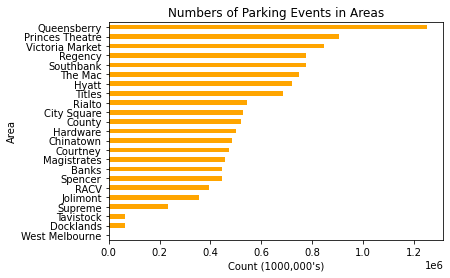

In [7]:
parkingDB['Area'].value_counts().sort_values().plot.barh(color="orange")
plt.title('Numbers of Parking Events in Areas')
plt.ylabel('Area')
plt.xlabel("Count (1000,000's)")

It's found that Queensberry street has the most number of parking events by a far margin in comparison with many of the other sites. 

Text(0.5, 0, 'Count')

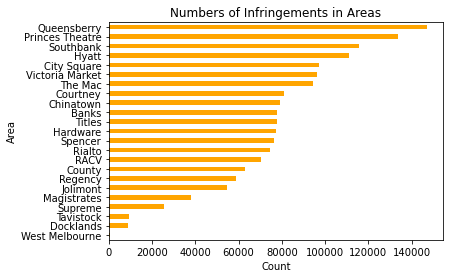

In [9]:
mask_violation = parkingDB['Violation'] == 1
parkingDB.loc[mask_violation, 'Area'].value_counts().sort_values().plot.barh(color="orange")
plt.title('Numbers of Infringements in Areas')
plt.ylabel('Area')
plt.xlabel("Count")

The number of parking infringements also seem to follow a similar pattern to the number of parking events in the same areas. To identify the relationship between these two variables, we will now plot a graph of the number of infringements based on the number of parking events of each section.

Text(0.5, 1.0, 'Number of Violations against Number of Events')

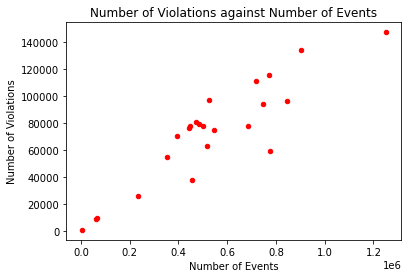

In [10]:
Viol_Num = parkingDB.loc[mask_violation, 'Area'].value_counts()
Num_Events = parkingDB['Area'].value_counts()

data = {'Number of Violations':  Viol_Num,
        'Number of Events': Num_Events}

df = pd.DataFrame (data, columns = ['Number of Violations','Number of Events'])

ax2 = df.plot.scatter(x='Number of Events',
                      y='Number of Violations',
                      c='red')
plt.title("Number of Violations against Number of Events")

There seems to be a positive linear correlation between the number of parking events and the number of violations in the same area. Therefore linear regression will be attempted first before more categorical values.

Text(0.5, 0, 'Infringement Rate')

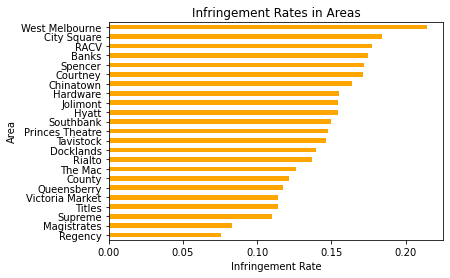

In [69]:
areas = parkingDB['Area'].value_counts()
violations = parkingDB.loc[mask_violation, 'Area'].value_counts()
areas = areas.astype(float)
violations = violations.astype(float)/areas
violations.sort_values().plot.barh(color="orange")
plt.title('Infringement Rates in Areas')
plt.ylabel('Area')
plt.xlabel("Infringement Rate")

### 2.2 Street Exploration

Text(0.5, 0, 'Count')

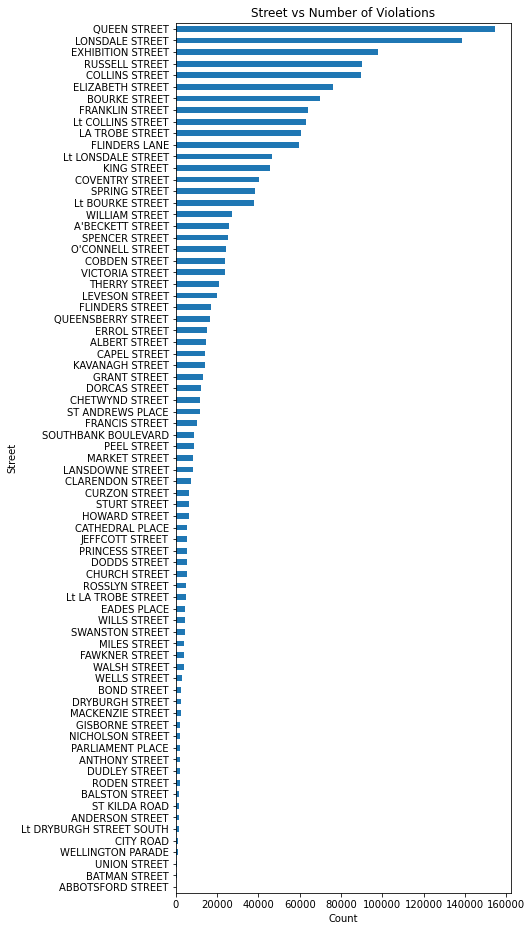

In [70]:
mask_violation = parkingDB['Violation'] == 1
plt.figure(figsize=(6,16))
parkingDB.loc[mask_violation, 'Street'].value_counts().sort_values().plot.barh()
plt.title('Street vs Number of Violations')
plt.ylabel('Street')
plt.xlabel("Count")

Text(0.5, 0, 'Count')

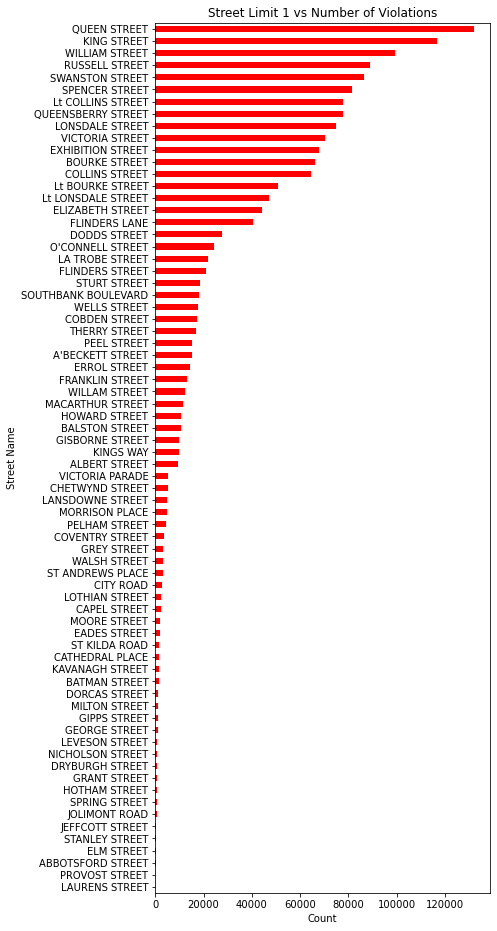

In [71]:
mask_violation = parkingDB['Violation'] == 1
plt.figure(figsize=(6,16))
parkingDB.loc[mask_violation, 'Street Limit 1'].value_counts().sort_values().plot.barh(color="red")
plt.title('Street Limit 1 vs Number of Violations')
plt.ylabel('Street Name')
plt.xlabel("Count")

Text(0.5, 0, 'Count')

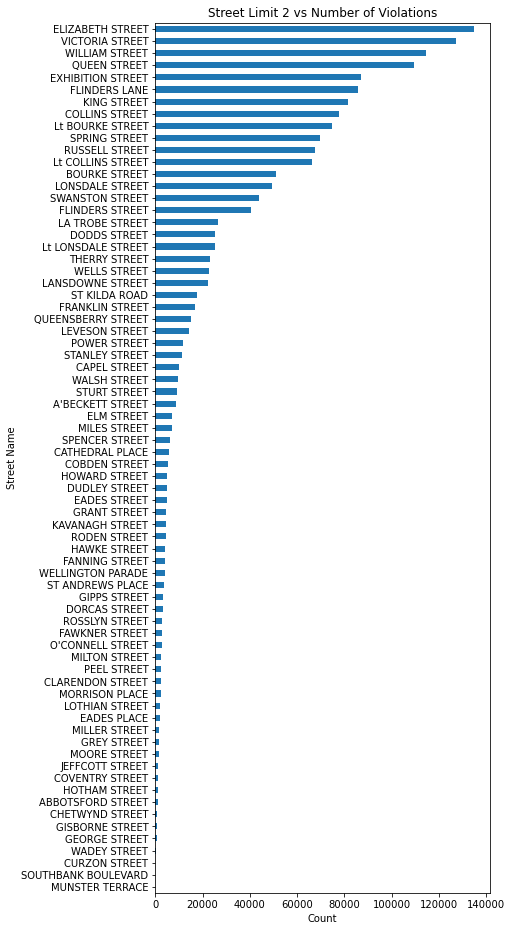

In [72]:
mask_violation = parkingDB['Violation'] == 1
plt.figure(figsize=(6,16))
parkingDB.loc[mask_violation, 'Street Limit 2'].value_counts().sort_values().plot.barh()
plt.title('Street Limit 2 vs Number of Violations')
plt.ylabel('Street Name')
plt.xlabel("Count")

Text(0.5, 0, 'Violation Count')

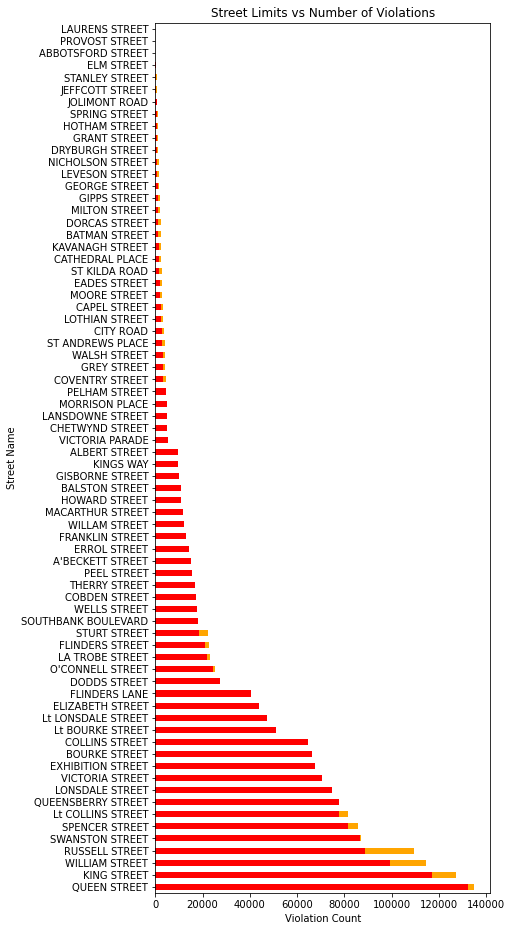

In [73]:
mask_violation = parkingDB['Violation'] == 1
plt.figure(figsize=(6,16))
parkingDB.loc[mask_violation, 'Street Limit 2'].value_counts().plot.barh(color="orange")
parkingDB.loc[mask_violation, 'Street Limit 1'].value_counts().plot.barh(color="red")

plt.title('Street Limits vs Number of Violations')
plt.ylabel('Street Name')
plt.xlabel("Violation Count")

After changing which street limit was either front or back, the number of violations for each of these side streets are almost identical whether or not these streets are classified as limit 1 or 2.

The top 4 street limits with the most violations include: 

    - Queen Street
    - King Street
    - William Street
    - Russell Street

This is applicable for both street limit 1 and 2.


The bottom 4 street limits with the most violations include:

    - Laurens Street
    - Provost Street
    - Abbotsford Street
    - Elm Street

This is also applicable for both street limit 1 and 2.


It is therefore reasonable to predict that these side streets with similar violation counts are close to one another and surround the actual street that is being parked in.

Text(0.5, 1.0, 'Number of Street Signs for each road')

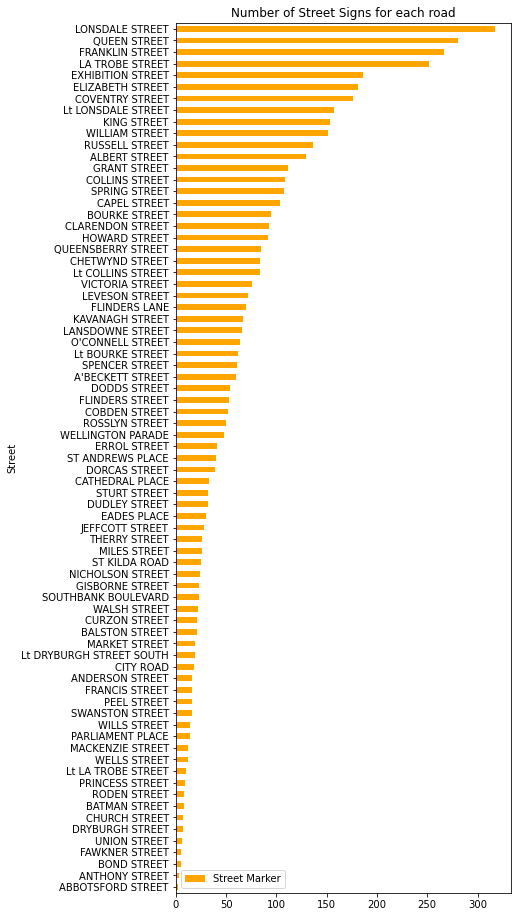

In [74]:
df = parkingDB.groupby('Street')
df = df.agg({'Street Marker':'nunique'}).sort_values(by='Street Marker')
df.plot.barh(figsize=(6, 16), color="orange")
plt.title('Number of Street Signs for each road')

Text(0.5, 0, 'Number of Streets')

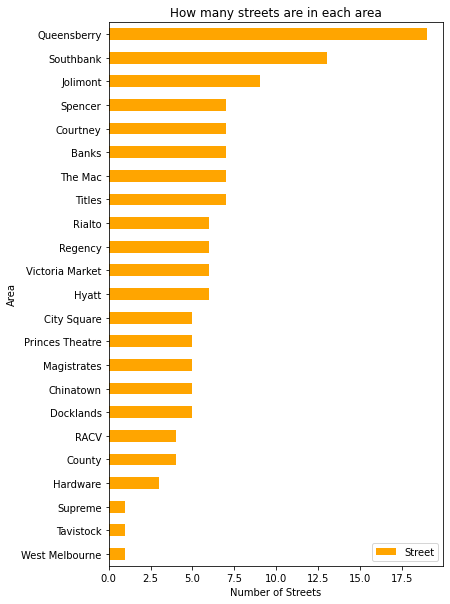

In [75]:
df = parkingDB.groupby('Area')
df = df.agg({'Street':'nunique'}).sort_values(by='Street')
df.plot.barh(figsize=(6, 10), color="orange")
plt.title('How many streets are in each area')
plt.xlabel("Number of Streets")


Text(0.5, 0, 'Number of Violations')

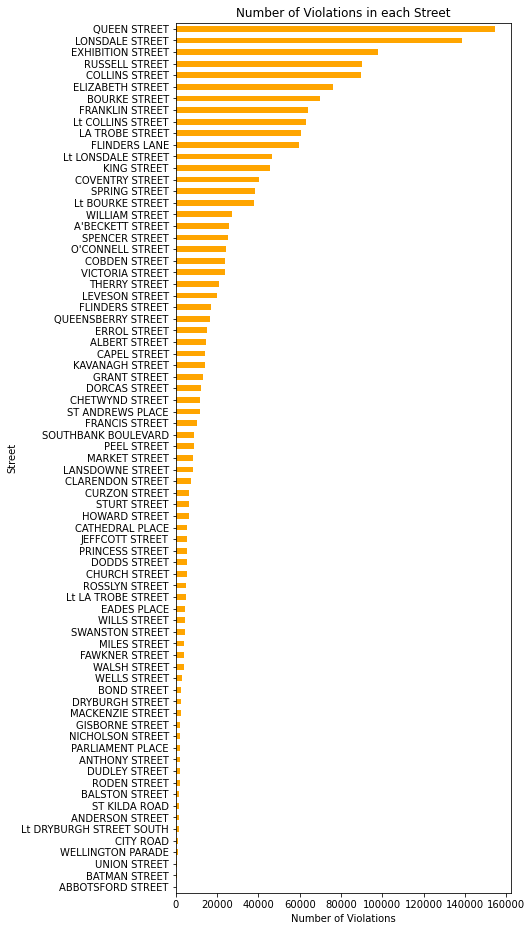

In [76]:
mask_violation = parkingDB['Violation'] == 1
plt.figure(figsize=(6,16))
parkingDB.loc[mask_violation, 'Street'].value_counts().sort_values().plot.barh(color="orange")
plt.title('Number of Violations in each Street')
plt.ylabel('Street')
plt.xlabel("Number of Violations")


Text(0.5, 0, 'Infringement Rate')

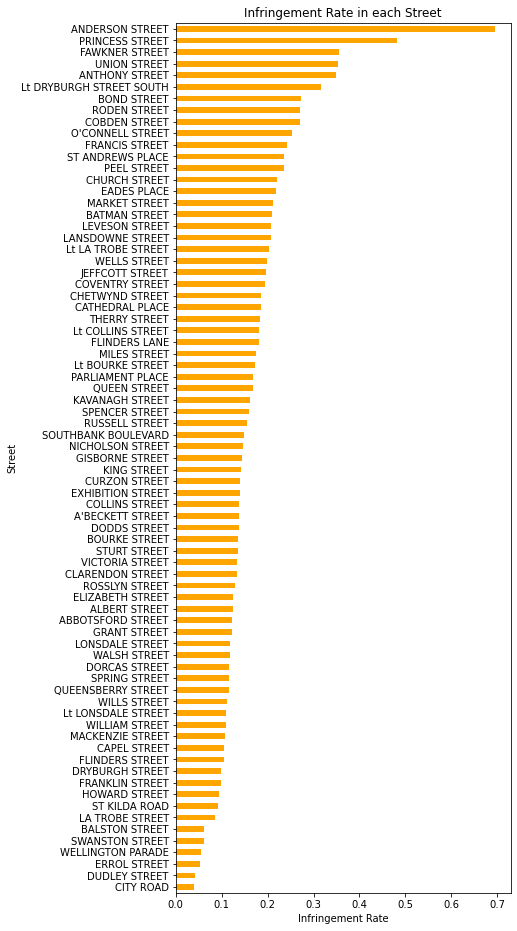

In [77]:
df = parkingDB['Street'].value_counts()
violations = parkingDB.loc[mask_violation, 'Street'].value_counts()
df = df.astype(float)
plt.figure(figsize=(6,16))
violations = violations.astype(float)/df
violations.sort_values().plot.barh(plt.xlabel("Number of Streets"), color="orange")
plt.title('Infringement Rate in each Street')
plt.ylabel('Street')
plt.xlabel("Infringement Rate")

### 2.3 Parking Duration Exploration

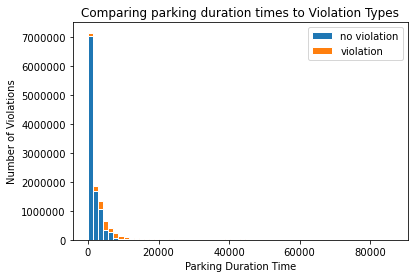

In [94]:

plt.hist(
    [parkingDB.loc[parkingDB['Violation'] == 0, 'Parking Duration (s)'],
     parkingDB.loc[parkingDB['Violation'] == 1, 'Parking Duration (s)']],
    stacked=True,
    label=['no violation', 'violation'],
    edgecolor='white', bins=60)
plt.ticklabel_format(style="plain")
plt.title("Comparing parking duration times to Violation Types")
plt.xlabel("Parking Duration Time (s)")
plt.ylabel("Number of Violations")

plt.legend()


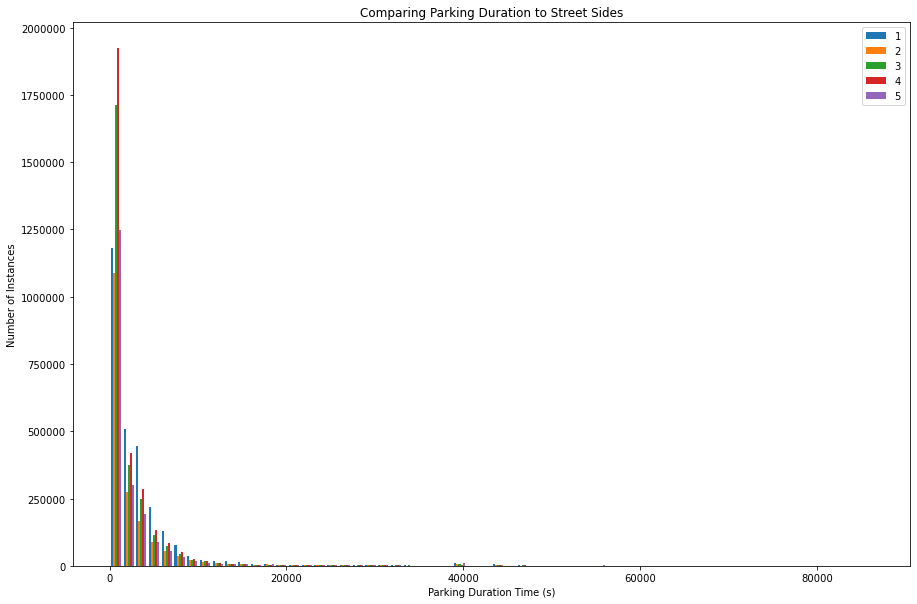

In [104]:
plt.figure(figsize=(15,10)) #change your figure size as per your desire here
plt.hist(
    [parkingDB.loc[parkingDB['Side Of Street'] == 1, 'Parking Duration (s)'],
     parkingDB.loc[parkingDB['Side Of Street'] == 2, 'Parking Duration (s)'],
     parkingDB.loc[parkingDB['Side Of Street'] == 3, 'Parking Duration (s)'],
     parkingDB.loc[parkingDB['Side Of Street'] == 4, 'Parking Duration (s)'],
     parkingDB.loc[parkingDB['Side Of Street'] == 5, 'Parking Duration (s)']],
    label=['1', '2', '3', '4', '5'], bins=60)
plt.ticklabel_format(style="plain")
plt.title("Comparing Parking Duration to Street Sides")
plt.xlabel("Parking Duration Time (s)")
plt.ylabel("Number of Instances")
plt.legend()



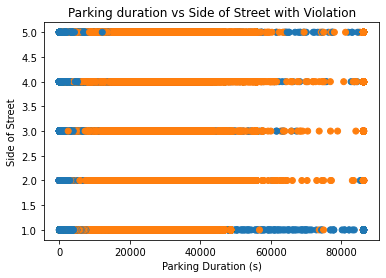

In [3]:
fig, ax = plt.subplots()
colors = {0:'tab:blue', 1:'tab:orange'}
ax.scatter(parkingDB['Parking Duration (s)'], parkingDB['Side Of Street'], c=parkingDB['Violation'].map(colors))
plt.title('Parking duration vs Side of Street with Violation')
plt.xlabel('Parking Duration (s)')
plt.ylabel('Side of Street')
plt.show()

Text(0.5, 0, 'Duration (s)')

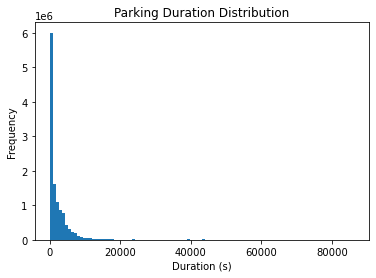

In [15]:
parkingDB['Parking Duration (s)'].plot(kind='hist', bins=100)
plt.title('Parking Duration Distribution')
plt.xlabel('Duration (s)')

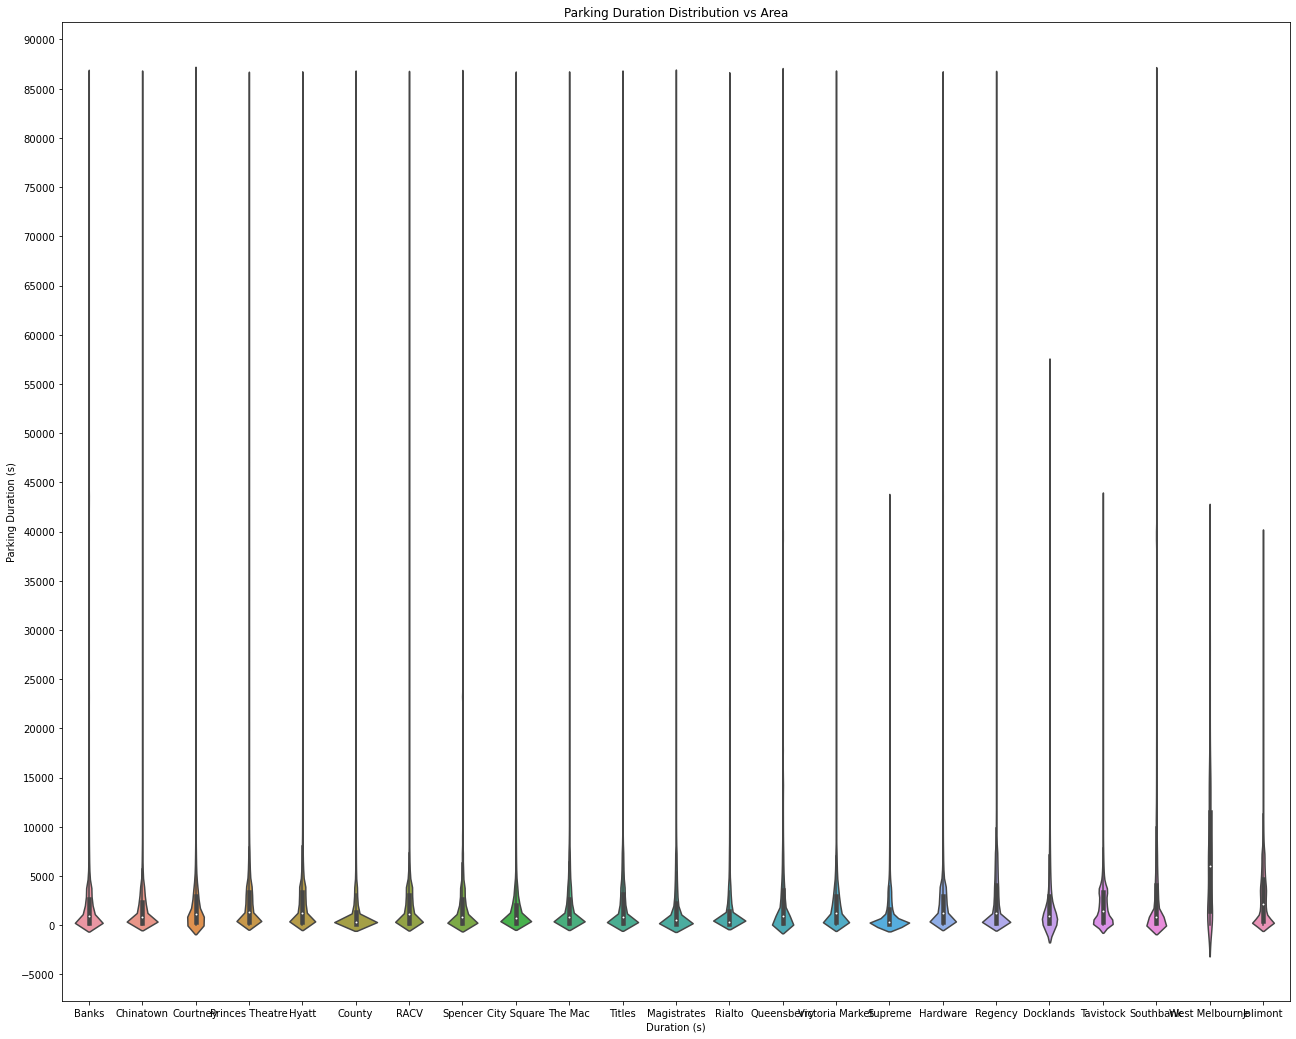

In [6]:
from matplotlib.pyplot import figure
plt.figure(figsize=(22,18))
sns.violinplot(x="Area", y="Parking Duration (s)", data=parkingDB)
#parkingDB.boxplot(figsize=(20, 18), column='Parking Duration (s)', by='Area', grid=True, showmeans=True)
plt.title('Parking Duration Distribution vs Area')
plt.xlabel('Duration (s)')
plt.locator_params(axis="y", nbins=20)

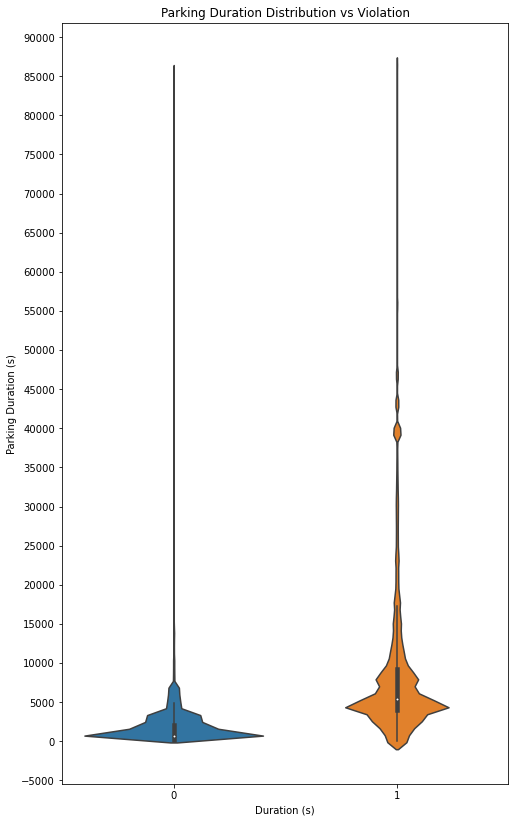

In [7]:
#parkingDB.boxplot(figsize=(8, 14), column='Parking Duration (s)', by='Violation', grid=True, showmeans=True)
plt.figure(figsize=(8,14))
sns.violinplot(x="Violation", y="Parking Duration (s)", data=parkingDB)
plt.title('Parking Duration Distribution vs Violation')
plt.xlabel('Duration (s)')
plt.locator_params(axis="y", nbins=20)

### 2.4 Device ID Exploration

Text(0.5, 1.0, 'Number of Unique Device IDs in each Area')

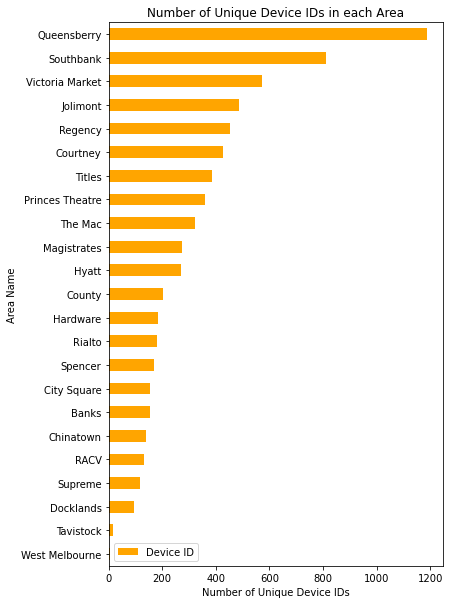

In [107]:
df = parkingDB.groupby('Area')
df = df.agg({'Device ID':'nunique'}).sort_values(by='Device ID')
df.plot.barh(figsize=(6, 10), color="orange")
plt.xlabel("Number of Unique Device IDs")
plt.ylabel("Area Name")
plt.title('Number of Unique Device IDs in each Area')

From this we see that the number of parking instances in these areas in comparison to the number of unique car IDs shows that these cars are regular consumers of carparking spaces in these areas.

Text(0.5, 1.0, 'Number of Unique Device IDs in each Street')

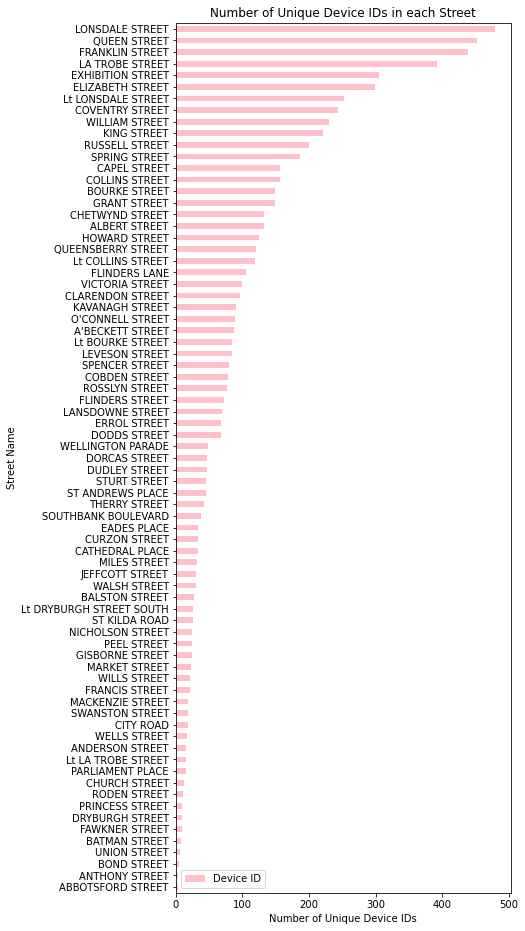

In [108]:
df = parkingDB.groupby('Street')
df = df.agg({'Device ID':'nunique'}).sort_values(by='Device ID')
df.plot.barh(figsize=(6, 16), color="pink")
plt.xlabel("Number of Unique Device IDs")
plt.ylabel("Street Name")
plt.title('Number of Unique Device IDs in each Street')

<AxesSubplot:title={'center':'Number of Violations in each Street'}, xlabel='Number of Violations', ylabel='Number of Device IDs'>

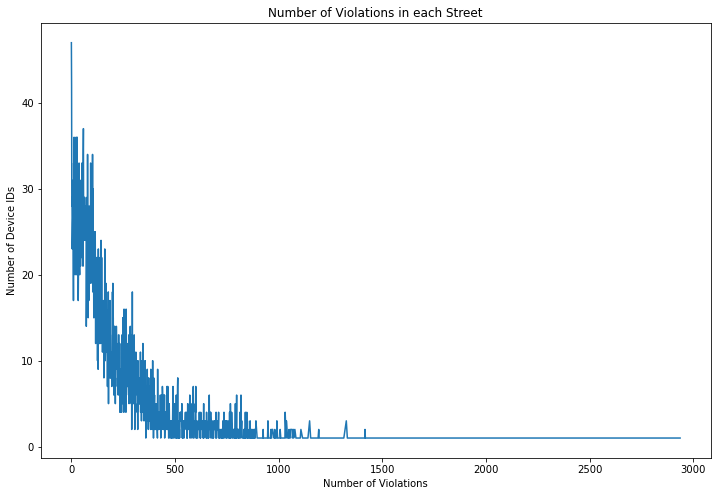

In [34]:
#e.g. There are 47 devices committed 1 violation each, meanwhile there is one device committed 2937 violations.
mask_violation = parkingDB['Violation'] == 1
df = parkingDB.loc[mask_violation, 'Device ID'].value_counts().sort_values()
#parkingDB.loc[mask_violation, 'Street'].value_counts().sort_values().plot.barh()
plt.title('Number of Violations vs Number of Devices')
plt.ylabel('Number of Device IDs')
plt.xlabel('Number of Violations')
df.value_counts().sort_index().plot.line(figsize=(12,8))

Text(0, 0.5, 'Number of Violations')

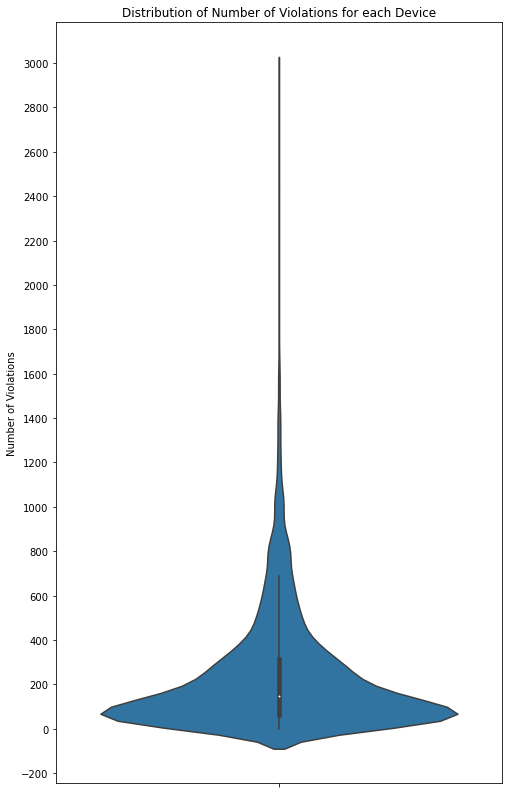

In [10]:
# mask_violation = parkingDB['Violation'] == 1
# df = parkingDB.loc[mask_violation, 'Device ID'].value_counts()
# #df.plot.box(figsize=(8, 14), grid=True, showmeans=True)
# plt.figure(figsize=(8,14))
# sns.violinplot(y=df, data=df)
# plt.locator_params(axis="y", nbins=20)
# plt.title('Distribution of Number of Violations for each Device')
# plt.ylabel('Number of Violations')
# MAKES NO SENSE

### 2.5 Multivariate Exploration

Text(0.5, 0, 'Number of Violations per Device')

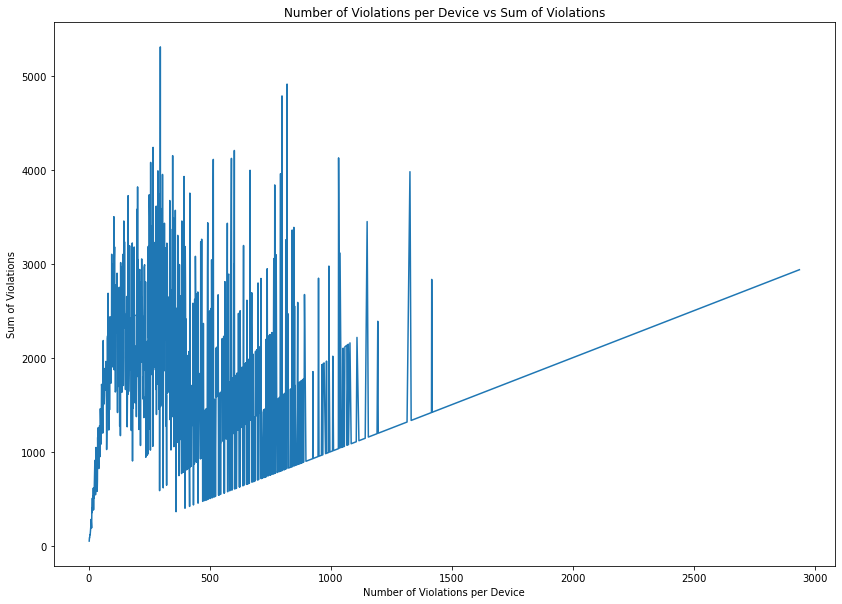

In [99]:
# If there are 5 devices committed 500 violations each, the sum of violations would be 5*500 = 2500, (500, 2500) on the graph
mask_violation = parkingDB['Violation'] == 1
df = parkingDB.loc[mask_violation, 'Device ID'].value_counts()
df_counts = df.value_counts().sort_index()
df_values = df_counts*df_counts.index
df_values.plot.line(figsize=(14, 10))
plt.title('Number of Violations per Device vs Sum of Violations')
plt.ylabel('Sum of Violations')
plt.xlabel('Number of Violations per Device')

### 2.22 Composition of All Violations by Violations per Device

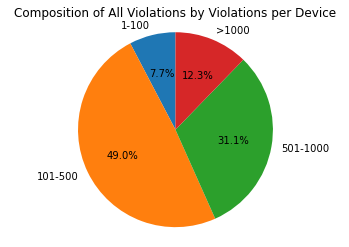

In [102]:
# 49% of all violations are committed by devices which committed 101-500 violations each
total_1_100 = df_values.loc[df_values.index <= 100].sum()
total_101_500 = df_values.loc[(101 <= df_values.index) & (df_values.index <= 500)].sum()
total_501_1000 = df_values.loc[(501 <= df_values.index) & (df_values.index <= 1000)].sum()
total_1001 = df_values.loc[1001 <= df_values.index].sum()
labels = '1-100', '101-500', '501-1000', '>1000'
sizes = [total_1_100, total_101_500, total_501_1000, total_1001]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Composition of All Violations by Violations per Device')
plt.show()

### 2.3 Individual Area Analysis

From this, I will be looking at all areas of melbourne that have violations, and determine what are the common factors in these violations.

#### 2.3.1 Queensberry

In [36]:
queensberry = parkingDB[parkingDB["Area"] == "Queensberry"]
queensberry = queensberry[queensberry["Violation"] == 1]
queensberry.head()


,Area,Street,Street Limit 1,Street Limit 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Parking Duration (s),Sign,Violation,Street ID,Device ID
45,Queensberry,ERROL STREET,QUEENSBERRY STREET,VICTORIA STREET,2,10174E,01/10/2011 12:01:29 AM,01/10/2011 01:33:36 AM,5527,LZ 30M M-SUN 00:00-23:59,1,641,3215
661,Queensberry,LEVESON STREET,QUEENSBERRY STREET,VICTORIA STREET,1,C6340,01/10/2011 07:30:00 AM,01/10/2011 12:30:00 PM,18000,4P MTR SAT 7:30-12:30,1,881,3525
672,Queensberry,CHETWYND STREET,VICTORIA STREET,STANLEY STREET,2,6034E,01/10/2011 07:30:07 AM,01/10/2011 12:30:00 PM,17993,1/2P RPA SAT 7:30-12:30,1,192,2738
673,Queensberry,CHETWYND STREET,VICTORIA STREET,STANLEY STREET,2,6044E,01/10/2011 07:30:07 AM,01/10/2011 12:30:00 PM,17993,2P RPA SAT 7:30-12:30,1,192,2733
674,Queensberry,CHETWYND STREET,VICTORIA STREET,STANLEY STREET,5,6047W,01/10/2011 07:30:07 AM,01/10/2011 12:30:00 PM,17993,1/2P RPA SAT 7:30-12:30,1,192,2720


Queensberry is currently the place with the most violations, and the most parking, so it's important to have a look at the statistics of what is happening to determine the best course of action.

We will start by simplifying the issue down to the the streets with the highest number of infringements.

In [50]:
print("Streets in this area: ", queensberry['Street'].unique().size)
queensberry['Street'].unique()

#violation count for street
print("Finding the number of times a street has a violation:\n", queensberry['Street'].value_counts().to_frame())

Streets in this area:  19
Finding the number of times a street has a violation:
                           Street
VICTORIA STREET            21761
LEVESON STREET             19703
ERROL STREET               15151
CAPEL STREET               14241
QUEENSBERRY STREET         13056
WILLIAM STREET             12591
CHETWYND STREET            11787
CURZON STREET               6308
HOWARD STREET               6254
ROSSLYN STREET              4911
KING STREET                 4654
EADES PLACE                 4546
WALSH STREET                3831
DRYBURGH STREET             2386
DUDLEY STREET               1885
RODEN STREET                1837
Lt DRYBURGH STREET SOUTH    1411
UNION STREET                 769
ABBOTSFORD STREET            163


The street importance will be ranked as the following:
    
- High Priority
- Medium Priority
- Low Priority

High priority being that these streets that contain more than 10,000 violations, medium priority having between 4,000-10,000 violations and low priority having under 5,000 violations.

This will mean that funding for recommendations will be based on how high priority the streets in these specific areas are (also in comparison to the violation numbers in other areas).

For now, let's only focus on high priority areas:

In [60]:
queensberryHIGH = queensberry[queensberry["Street"].isin(['VICTORIA STREET', 'LEVESON STREET', 'ERROL STREET', 'CAPEL STREET', 'QUEENSBERRY STREET', 'WILLIAM STREET', 'CHETWYND STREET'])]

Now based on the high priority streets, let's look at the sides of the street that require attention: 

In [73]:
print("Size of Street ", queensberryHIGH['Side Of Street'].unique().size, "\n")
queensberryHIGH['Side Of Street'].unique()

#violation count for Side of street
print("Finding the number of times a street has a violation:\n", queensberryHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", queensberryHIGH['Side Of Street'].value_counts(normalize=True)*100)


Size of Street  5 

Finding the number of times a street has a violation:
    Side Of Street
1           31962
2           30457
5           17519
3           15341
4           13011 

The Percentages of each Side of Street in a Violation: 
 1    29.515191
2    28.125404
5    16.177856
3    14.166590
4    12.014960
Name: Side Of Street, dtype: float64


From this we can therefore see that the violation types are mostly to do with side 1 and 2. Therefore if budget is an issue, recommendations to this budget will pertain to mostly side 1 and 2. If budget will allow, side 5 will also be applicable.

We will now observe the parking signs to determine whether the signs should allow for more time, or if other parking solutions should be employed. 

In [94]:
#make separate dataframe
queensberryHIGH12 = queensberryHIGH[queensberryHIGH["Side Of Street"] <= 2]

In [146]:
print("Counting Signs in Violations \n", queensberryHIGH['Sign'].value_counts().to_frame(), "\n")


Counting Signs in Violations 
                                     Sign
1P TKT A M-F 7:30-18:30            10792
4P MTR M-F 7:30-18:30              10474
1P MTR M-F 7:30-18:30               4684
1P M-F 18:30-23:30                  3904
4P MTR M-SAT 7:30-18:30             3623
2P MTR M-SAT 7:30-18:30             3469
2P MTR RPA M-F 7:30-18:30           3096
2P SUN 7:30-18:30                   2597
1P MTR RPA M-SUN 7:30-23:00         2458
1/2P RPA M-F 7:30-18:30             2114
LZ 15M M-F 7:30-18:30               1474
4P MTR RPA M-F 7:30-18:30           1472
1P RPA M-SUN 7:30-23:00             1445
2P TKT A M-F 7:30-18:30             1424
1/2P RPA M-SAT 7:30-18:30           1286
1P SAT 12:30-23:30                  1246
1P TKT A SAT 7:30-12:30             1218
LZ 30M M-SUN 00:00-23:59            1036
4P MTR SAT 7:30-12:30                877
1P MTR SAT 7:30-12:30                608
2P SAT 7:30-12:30                    529
1P DIS M-SUN 0:00-23:59              462
2P RPA M-F 7:30-18:30     

Let's use the cutoff measure of 1000 violations. It seems here that the issues with the most violations comes from having parking spaces for only 1 hour. Ocassionally a 2 hour parking space also has violations of over a count of 1000, and 4 hour parking spaces have the second highest infraction rate. Most of these violations come from limits throughout the working day on a Monday to Friday, with the occasional on a Saturday or Sunday.

There is also a fairly normal spread of RPA, ticket and meter signs within this spread. I'll test the parking duration on these signs to determine whether it was a minor overstay or a considerable overstay:

In [113]:
print("Testing the Worst Ranked Signs\n")

#sign 1
print("SIGN ONE: 1P TKT A M-F 7:30-18:30")
queensberryLOS = queensberryHIGH[queensberryHIGH["Sign"] == "1P TKT A M-F 7:30-18:30"]
print("Value Counts for Parking Duration: ", queensberryLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(queensberryLOS['Parking Duration (s)'].max()/60)/60), "Hours")
#sign 2
print("SIGN TWO: 4P MTR M-F 7:30-18:30")
queensberryLOS = queensberryHIGH[queensberryHIGH["Sign"] == "4P MTR M-F 7:30-18:30"]
print("Value Counts for Parking Duration: ", queensberryLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(queensberryLOS['Parking Duration (s)'].max()/60)/60), "Hours")
#sign 3
print("SIGN THREE: 1/4P M-F 7:30-18:30")
queensberryLOS = queensberryHIGH[queensberryHIGH["Sign"] == "1/4P M-F 7:30-18:30"]
print("Value Counts for Parking Duration: ", queensberryLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(queensberryLOS['Parking Duration (s)'].max()/60)/60), "Hours")
#sign 4
print("SIGN FOUR: 1/4P 1P MTR RPA M-SUN 7:30-23:00")
queensberryLOS = queensberryHIGH[queensberryHIGH["Sign"] == "1P MTR RPA M-SUN 7:30-23:00"]
print("Value Counts for Parking Duration: ", queensberryLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(queensberryLOS['Parking Duration (s)'].max()/60)/60), "Hours")
#sign 5
print("SIGN FIVE: 1P MTR M-SAT 7:30-18:30")
queensberryLOS = queensberryHIGH[queensberryHIGH["Sign"] == "1P MTR M-SAT 7:30-18:30"]
print("Value Counts for Parking Duration: ", queensberryLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(queensberryLOS['Parking Duration (s)'].max()/60)/60), "Hours")
#sign 6
print("SIGN SIX: 1P MTR M-F 7:30-18:30")
queensberryLOS = queensberryHIGH[queensberryHIGH["Sign"] == "1P MTR M-F 7:30-18:30"]
print("Value Counts for Parking Duration: ", queensberryLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(queensberryLOS['Parking Duration (s)'].max()/60)/60), "Hours")
#sign 7
print("SIGN SEVEN: 1/2P RPA M-F 7:30-18:30")
queensberryLOS = queensberryHIGH[queensberryHIGH["Sign"] == "1/2P RPA M-F 7:30-18:30"]
print("Value Counts for Parking Duration: ", queensberryLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(queensberryLOS['Parking Duration (s)'].max()/60)/60), "Hours")
#sign 8
print("SIGN EIGHT: 1P M-F 7:30-18:30")
queensberryLOS = queensberryHIGH[queensberryHIGH["Sign"] == "1P M-F 7:30-18:30"]
print("Value Counts for Parking Duration: ", queensberryLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(queensberryLOS['Parking Duration (s)'].max()/60)/60), "Hours")
#sign 9
print("SIGN NINE: 2P MTR RPA M-F 7:30-18:30")
queensberryLOS = queensberryHIGH[queensberryHIGH["Sign"] == "2P MTR RPA M-F 7:30-18:30"]
print("Value Counts for Parking Duration: ", queensberryLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(queensberryLOS['Parking Duration (s)'].max()/60)/60), "Hours")
#sign 10
print("SIGN TEN: 1/4P M-SAT 7:30-18:30")
queensberryLOS = queensberryHIGH[queensberryHIGH["Sign"] == "1/4P M-SAT 7:30-18:30"]
print("Value Counts for Parking Duration: ", queensberryLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(queensberryLOS['Parking Duration (s)'].max()/60)/60), "Hours")





Testing the Worst Ranked Signs

SIGN ONE: 1P TKT A M-F 7:30-18:30
Value Counts for Parking Duration:         Parking Duration (s)
39592                   998
39593                   560
39591                    86
3965                     18
3941                     17
...                     ...
23592                     1
7224                      1
17467                     1
15420                     1
25613                     1

[6307 rows x 1 columns]
The time (hours) of the max length of stay is:  11.0 Hours
SIGN TWO: 4P MTR M-F 7:30-18:30
Value Counts for Parking Duration:         Parking Duration (s)
39593                  1798
39592                   888
39591                   107
39590                    32
39589                    29
...                     ...
16484                     1
18533                     1
30827                     1
16492                     1
22525                     1

[4936 rows x 1 columns]
The time (hours) of the max length of stay is:  1

A lot of the signs tend to have a really high margin for parking durations, where people stay for almost an entire day and subsequently get fined. This is irrelevant to the types of ticketing machine or charge used.

This is considerable findings. This means that people, on average, during the working day do not stay for only 1 hour. Instead they stay parked in these areas for more than 10 hours. This indicates that possible these individuals park their car for the work day (let's assume a 9-5 role). This takes away 8 hours already. Then let's assume a buffer time of 30 minutes to park and travel to work, and 30 minutes after work to get to the car. This adds an extra hour. so 9/11 hours are accounted for for workers. Another 2 hours can include post-work outings, drinks or shopping. 

Now this area is ticketed, which means they are paying for a spot, but are unable to continue paying every hour or move their car, furthering the point that they are probably working people. Another factor, as seen by graphs previous to this, is that the car IDs are constantly reoccuring in all areas. This inidicates furthermore that these drivers are regulars in the area, and that they park during the morning and afternoon of a work week.

Solutions to this would include: 

- Removing the 1 and 1/2 hour limits from Monday to Fridays, but keeping the ticketing system. This allows workers to use this space for their entire shift but allows for the owners of the parking spaces to still make money from the ticketing system. There can be instances where not all issues of this sign have to change, as keeping a few will allow others coming into the city to drop off packages or to complete other quick errands. This will also allow people to use more sustainable, eco friendly options like cycling, taking public transport or using ride-share apps. 
- Removing this limit also allows for people to park safely when they are attending a night out in the city, without worrying about parking fines. 
- Keeping limits for Sundays and Saturdays, since 'day out' attendance can be supplemented by using public transport. 

Now let's introduce medium priority streets around the area of Queensberry:

In [137]:
queensberryMED = queensberry[queensberry["Street"].isin(['CURZON STREET', 'HOWARD STREET', 'ROSSLYN STREET', 'KING STREET', 'EADES STREET'])]
print("Counting Signs in Violations \n", queensberryMED['Sign'].value_counts().to_frame(), "\n")

Counting Signs in Violations 
                                    Sign
4P MTR M-F 7:30-18:30              6334
1P A RPE M-F 7:30-18:30            4218
2P M-F 7:30-18:30                  2151
2P M-SUN 7:30-18:30                2047
4P TKT A M-F 7:30-18:30            1744
1P M-F 7:30-18:30                  1702
1/4P M-F 7:30-18:30                1199
1P MTR M-F 7:30-18:30               889
2P SAT 7:30-12:30                   450
1P A RPE SAT 7:30-12:30             436
4P MTR SAT 7:30-12:30               382
1P SAT 7:30-12:30                   194
1P RPA M-F 7:30-18:30               162
2P DIS M-SUN 0:00-23:59              81
1P MTR SAT 7:30-12:30                55
4P TKT A SAT 7:30-12:30              48
1P RPA SAT 7:30-12:30                19
1/4P SAT 7:30-12:30                  11
Temp Sign Plate Sun-Sun 4:00-5:00     5 



Let's use the cutoff measure of 1000 violations. This spread is smaller, and the top 7 have a relatively even mix of parking signs of 1, 2 and 4 hour lengths. All also have a spread of Monday-Friday during the working day, with the exception of the 4th highest sign, 2P M-SUN 7:30-18:30 (with a count of ~2000 violations).

I will go through the same process with these to compare results to streets of the highest priority.

In [138]:
print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 4P MTR M-F 7:30-18:30")
queensberryMED = queensberryMED[queensberryMED["Sign"] == "4P MTR M-F 7:30-18:30"]
print("Value Counts for Parking Duration: ", queensberryMED['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(queensberryMED['Parking Duration (s)'].max()/60)/60), "Hours")
#sign 2-7 have NAs and null values in them



Testing the Worst Ranked Signs

SIGN ONE: 4P MTR M-F 7:30-18:30
Value Counts for Parking Duration:         Parking Duration (s)
39593                   783
39592                   376
39591                    45
14746                     7
39590                     7
...                     ...
23534                     1
29679                     1
17393                     1
15346                     1
28670                     1

[3862 rows x 1 columns]
The time (hours) of the max length of stay is:  11.0 Hours


In this instance, many of the top violations had null values in them, and so the time wasn't computed. Going off of the most highly ranked sign (in terms of violations), the outcome is still the same as that of the high priority streets within Queensberry.

#### 2.3.2 Princes Theatre

In [8]:
princesTheatre = parkingDB[parkingDB["Area"] == "Princes Theatre"]
princesTheatre = princesTheatre[princesTheatre["Violation"] == 1]
print(princesTheatre.head())
print("The exact number of infringements in Princes Theatre: ", princesTheatre.size)

               Area            Street  Street Limit 1     Street Limit 2  \
27  Princes Theatre     BOURKE STREET  RUSSELL STREET  EXHIBITION STREET   
32  Princes Theatre  Lt BOURKE STREET  RUSSELL STREET  EXHIBITION STREET   
40  Princes Theatre  Lt BOURKE STREET  RUSSELL STREET  EXHIBITION STREET   
43  Princes Theatre  Lt BOURKE STREET  RUSSELL STREET  EXHIBITION STREET   
60  Princes Theatre     BOURKE STREET  RUSSELL STREET  EXHIBITION STREET   

    Side Of Street Street Marker            Arrival Time  \
27               4         2381S  01/10/2011 12:01:24 AM   
32               4         2531S  01/10/2011 12:01:25 AM   
40               4         2529S  01/10/2011 12:01:28 AM   
43               4         2527S  01/10/2011 12:01:29 AM   
60               4         2383S  01/10/2011 12:01:56 AM   

            Departure Time  Parking Duration (s)                    Sign  \
27  01/10/2011 03:36:42 AM                 12918    P10 M-SUN 0:00-23:59   
32  01/10/2011 02:19:48 AM    

Princess Theatre is the area with the second highest rate of infringements, closely behind Queensberry. The same methodology for Queensberry will be applied to Princes Theatre below:

In [9]:
print("Streets in this area: ", princesTheatre['Street'].unique().size)
princesTheatre['Street'].unique()

#violation count for street
print("Finding the number of times a street has a violation:\n", princesTheatre['Street'].value_counts().to_frame())

Streets in this area:  5
Finding the number of times a street has a violation:
                    Street
LONSDALE STREET     53128
EXHIBITION STREET   33090
BOURKE STREET       26660
Lt BOURKE STREET    12836
SPRING STREET        8098


All of these streets have significant levels of violations. The high priority violations will be assessed first. This is inclusive of 4 streets in total.

In [10]:
princesTheatreHIGH = princesTheatre[princesTheatre["Street"].isin(['LONSDALE STREET', 'EXHIBITION STREET', 'BOURKE STREET', 'Lt BOURKE STREET'])]

Now let's observe side of streets

In [11]:
print("Size of Street ", princesTheatreHIGH['Side Of Street'].unique().size, "\n")
princesTheatreHIGH['Side Of Street'].unique()

#violation count for Side of street
print("Finding the number of times a street has a violation:\n", princesTheatreHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", princesTheatreHIGH['Side Of Street'].value_counts(normalize=True)*100)


Size of Street  5 

Finding the number of times a street has a violation:
    Side Of Street
1           62004
4           32988
3           19263
5            6495
2            4964 

The Percentages of each Side of Street in a Violation: 
 1    49.321476
4    26.240514
3    15.322876
5     5.166489
2     3.948645
Name: Side Of Street, dtype: float64


Therefore the biggest worry is side number 1, with an almost 50% share in violations. Side 4 is also considerable, covering 25% of the total violations. Both of these sides will be looked at, and sides 3,5 and 2 will not be considered. 

In [12]:
print("Counting Signs in Violations \n", princesTheatreHIGH['Sign'].value_counts().to_frame(), "\n")

Counting Signs in Violations 
                             Sign
1P MTR M-SAT 7:30-19:30    55692
1P SUN 7:30-18:30          14567
1P TKT A M-SAT 7:30-19:30  11528
2P MTR M-SAT 7:30-20:30     9900
1/2P MTR M-SAT 7:30-19:30   7051
P10 M-SUN 0:00-23:59        5050
1/2P MTR M-F 9:30-19:30     3305
1P MTR M-F 7:30-16:00       3052
2P SUN 7:30-18:30           2010
1P M-SAT 7:30-19:30         1915
1/4P M-SUN 7:30-18:30       1903
2P DIS M-SUN 0:00-23:59     1170
1P AOT M-SAT 19:30-23:59    1102
1P MTR SAT 7:30-19:30        882
1/2P M-SAT 7:30-19:30        800
1/2P MTR SAT 7:30-1930       727
1P AOT SUN 0:00-23:59        723
1P AOT M-SAT 0:00-7:30       682
1P MTR M-F 9:30-19:30        628
1P SUN 7:30-19:30            516
CW TOW M-F 7:00-9:30         511
CW TOW M-F 16:00-18:30       450
2P DIS AOT 9:30-23:59        363
2P DIS M-SUN 7:30-19:30      319
3P DIS M-SUN 7:30-19:30      291
2P DIS AOT 0:00-23:59        246
2P DIS M-F 7:30-16:00        183
2P DIS AOT 0:00-7:00          62
2P DIS SUN 7

Let's use the cutoff measure of 3000 violations. It seems here that the issues with the most violations comes from having parking spaces for only 1 hour. Ocassionally a 2 hour or half hour parking space also has violations of over a count of 1000.

The days are also more spread out, to include Saturdays in most cases, and in some, Sundays also. 

In [13]:
print("Testing the Worst Ranked Signs\n")

#sign 1
print("SIGN ONE: 1P MTR M-SAT 7:30-19:30")
princessLOS = princesTheatreHIGH[princesTheatreHIGH["Sign"] == "1P MTR M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", princessLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(princessLOS['Parking Duration (s)'].max()/60)/60), "Hours")

#sign 2
print("SIGN TWO: 1P SUN 7:30-18:30")
princessLOS = princesTheatreHIGH[princesTheatreHIGH["Sign"] == "1P SUN 7:30-18:30"]
print("Value Counts for Parking Duration: ", princessLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(princessLOS['Parking Duration (s)'].max()/60)/60), "Hours")

#sign 3
print("SIGN THREE: 1P TKT A M-SAT 7:30-19:30")
princessLOS = princesTheatreHIGH[princesTheatreHIGH["Sign"] == "1P TKT A M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", princessLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(princessLOS['Parking Duration (s)'].max()/60)/60), "Hours")

#sign 4
print("SIGN FOUR: 2P MTR M-SAT 7:30-20:30")
princessLOS = princesTheatreHIGH[princesTheatreHIGH["Sign"] == "2P MTR M-SAT 7:30-20:30"]
print("Value Counts for Parking Duration: ", princessLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(princessLOS['Parking Duration (s)'].max()/60)/60), "Hours")

#sign 5
print("SIGN FIVE: 1/2P MTR M-SAT 7:30-19:30")
princessLOS = princesTheatreHIGH[princesTheatreHIGH["Sign"] == "1/2P MTR M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", princessLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(princessLOS['Parking Duration (s)'].max()/60)/60), "Hours")

#sign 6
print("SIGN SIX: P10 M-SUN 0:00-23:59")
princessLOS = princesTheatreHIGH[princesTheatreHIGH["Sign"] == "P10 M-SUN 0:00-23:59"]
print("Value Counts for Parking Duration: ", princessLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(princessLOS['Parking Duration (s)'].max()/60)/60), "Hours")

#sign 7
print("SIGN SEVEN: 1/2P MTR M-F 9:30-19:30")
princessLOS = princesTheatreHIGH[princesTheatreHIGH["Sign"] == "1/2P MTR M-F 9:30-19:30"]
print("Value Counts for Parking Duration: ", princessLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(princessLOS['Parking Duration (s)'].max()/60)/60), "Hours")

#sign 8
print("SIGN EIGHT: 1P MTR M-F 7:30-16:00")
princessLOS = princesTheatreHIGH[princesTheatreHIGH["Sign"] == "1P MTR M-F 7:30-16:00"]
print("Value Counts for Parking Duration: ", princessLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(princessLOS['Parking Duration (s)'].max()/60)/60), "Hours")





Testing the Worst Ranked Signs

SIGN ONE: 1P MTR M-SAT 7:30-19:30
Value Counts for Parking Duration:         Parking Duration (s)
43192                   336
43193                   304
3941                     52
3911                     51
3907                     50
...                     ...
17287                     1
27522                     1
11050                     1
23332                     1
10059                     1

[9439 rows x 1 columns]
The time (hours) of the max length of stay is:  12.0 Hours
SIGN TWO: 1P SUN 7:30-18:30
Value Counts for Parking Duration:         Parking Duration (s)
39592                    97
39593                    71
3973                     20
4036                     18
3960                     17
...                     ...
13194                     1
23439                     1
9104                      1
11153                     1
9568                      1

[5169 rows x 1 columns]
The time (hours) of the max length of stay is:  11.0 

These results somewhat mimic what was happening in the queensberry instance, where working class individuals were parking for long periods of time during the working day. However another interesting observation has been made, specifically in the case of 'P10 M-SUN 0:00-23:59', where cases stayed for almost a full day. This could be indicative of those during the night life of the city, staying for longer periods of time, drinking and subsequently not being able to drive back home.

This is one of multiple scenarios that could occur. But this is deduced given that this sign also applies to the Sunday, whereas most other signs do not. I'll compare these broad values with that of the 

#### 2.3.3 Southbank

In [14]:
southbank = parkingDB[parkingDB["Area"] == "Southbank"]
southbank = southbank[southbank["Violation"] == 1]
print(southbank.head())
print("The exact number of infringements in Southbank: ", southbank.size)

             Area        Street       Street Limit 1 Street Limit 2  \
453929  Southbank  DODDS STREET  SOUTHBANK BOULEVARD   GRANT STREET   
455210  Southbank  DODDS STREET  SOUTHBANK BOULEVARD   GRANT STREET   
456678  Southbank  DODDS STREET  SOUTHBANK BOULEVARD   GRANT STREET   
457764  Southbank  DODDS STREET  SOUTHBANK BOULEVARD   GRANT STREET   
458316  Southbank  DODDS STREET  SOUTHBANK BOULEVARD   GRANT STREET   

        Side Of Street Street Marker            Arrival Time  \
453929               5         8311W  14/10/2011 08:42:18 AM   
455210               2         8342E  14/10/2011 09:07:26 AM   
456678               2         8340E  14/10/2011 09:31:00 AM   
457764               2         8332E  14/10/2011 09:49:14 AM   
458316               2         8338E  14/10/2011 09:57:27 AM   

                Departure Time  Parking Duration (s)                     Sign  \
453929  14/10/2011 12:35:33 PM                 13995  2P TKT A M-F 7:30-18:30   
455210  14/10/2011 06:30:0

In [16]:
print("Streets in this area: ", southbank['Street'].unique().size)
southbank['Street'].unique()

#violation count for street
print("Finding the number of times a street has a violation:\n", southbank['Street'].value_counts().to_frame())

Streets in this area:  13
Finding the number of times a street has a violation:
                      Street
COVENTRY STREET       40408
KAVANAGH STREET       14051
GRANT STREET          13287
DORCAS STREET         12146
SOUTHBANK BOULEVARD    8921
STURT STREET           6289
DODDS STREET           5340
MILES STREET           4054
FAWKNER STREET         3949
WELLS STREET           3123
BALSTON STREET         1564
ST KILDA ROAD          1547
CITY ROAD              1075


The top 4 streets with violations are: Coventry, Kavanagh, Grant and Dorcas street. These will be teh top analysed streets to reduce violation numbers.

In [29]:
southbankHIGH = southbank[southbank["Street"].isin(['CONVENTRY STREET', 'KAVANAGH STREET', 'GRANT STREET', 'DORCAS STREET'])]

print("Size of Street ", southbankHIGH['Side Of Street'].unique().size, "\n")
southbankHIGH['Side Of Street'].unique()

#violation count for Side of street
print("Finding the number of times a street has a violation:\n", southbankHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", southbankHIGH['Side Of Street'].value_counts(normalize=True)*100)

southbankHIGH35 = southbankHIGH[southbankHIGH["Side Of Street"].isin([3, 5])]


Size of Street  4 

Finding the number of times a street has a violation:
    Side Of Street
3           22214
5            8060
2            5991
4            3219 

The Percentages of each Side of Street in a Violation: 
 3    56.260764
5    20.413332
2    15.173235
4     8.152669
Name: Side Of Street, dtype: float64


It appears as there are only 4 counts in side of street. The main areas of focus include sides 3 and 5, given side 3 counts for more than 50% of the violations. When incorporating side 5, we pass a violation rate of 75% and so this will also be included.

In [30]:
print("Counting Signs in Violations \n", southbankHIGH35['Sign'].value_counts().to_frame(), "\n")

Counting Signs in Violations 
                                     Sign
1P TKT A RPA M-F 7:30-18:30        18326
2P TKT A M-F 7:30-18:30             8570
1P TKT A M-F 7:30-18:30             7981
3P TKT A M-SAT 7:30-18:30           5162
2P RPA M-F 7:30-18:30               3305
2P M-F 7:30-18:30                   2645
2P TKT A M-SAT 7:30-18:30           2244
1P MTR M-F 7:30-19:30               2205
2P TKT A RPA M-F 7:30-18:30         2157
LZ 15M M-F 7:30-18:30               2114
2P RPA S-S 7:30-23:00               1826
1P MTR M-SAT 7:30-19:30             1780
LZ 30M M-F 7:30-18:30               1717
2P MTR RPA M-F 7:30-18:30           1591
P/ 15 M-SUN 00:00-23:59             1064
2P SUN 7:30-18:30                   1014
4P DIS ONLY M-SUN                    967
3P SUN 7:30-18:30                    949
2P MTR M-F 7:30-18:30                815
P/ 10 M-SUN 0:00-11:59               781
3P TKT A M-F 7:30-18:30              757
LZ 15M M-SUN 0:00-23:59              679
S/ No Stop M-Sun 0:00-23-5

Again, it seems like the majority of high violation cases are those that are between normal working hours and have a limit of 2 hours or less. 

In [31]:
print("Testing the Worst Ranked Signs\n")

#sign 1
print("SIGN ONE: 1P TKT A RPA M-F 7:30-18:30")
southbankLOS = southbankHIGH35[southbankHIGH35["Sign"] == "1P TKT A RPA M-F 7:30-18:30"]
print("Value Counts for Parking Duration: ", southbankLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(southbankLOS['Parking Duration (s)'].max()/60)/60), "Hours")


Testing the Worst Ranked Signs

SIGN ONE: 1P TKT A RPA M-F 7:30-18:30
Value Counts for Parking Duration:         Parking Duration (s)
39593                  2369
39592                  1123
39591                   107
39590                    36
39589                    12
...                     ...
14401                     1
6213                      1
32838                     1
30793                     1
4094                      1

[11020 rows x 1 columns]
The time (hours) of the max length of stay is:  11.0 Hours


This also confirms like in the other cases, where the violations are for a full work day give or take another couple of hours. This will only be tested on teh above 10,000 violation figures as it is more of a confirmation about the pattern being found in many of these areas. 

#### 2.3.4 Hyatt

In [42]:
hyatt = parkingDB[parkingDB["Area"] == "Hyatt"]
hyatt = hyatt[hyatt["Violation"] == 1]
print(hyatt.head())
print("The exact number of infringements around the Hyatt: ", hyatt.size)

      Area             Street     Street Limit 1   Street Limit 2  \
19   Hyatt      SPRING STREET      FLINDERS LANE  FLINDERS STREET   
35   Hyatt  Lt COLLINS STREET  EXHIBITION STREET    SPRING STREET   
98   Hyatt    FLINDERS STREET  EXHIBITION STREET    SPRING STREET   
106  Hyatt    FLINDERS STREET  EXHIBITION STREET    SPRING STREET   
302  Hyatt    FLINDERS STREET  EXHIBITION STREET    SPRING STREET   

     Side Of Street Street Marker            Arrival Time  \
19                2            2E  01/10/2011 12:01:20 AM   
35                4         2133S  01/10/2011 12:01:25 AM   
98                3         1596N  01/10/2011 12:36:28 AM   
106               3         1596N  01/10/2011 12:44:02 AM   
302               3         1596N  01/10/2011 04:50:52 AM   

             Departure Time  Parking Duration (s)  \
19   01/10/2011 11:59:00 PM                 86260   
35   01/10/2011 05:43:12 AM                 20507   
98   01/10/2011 12:39:33 AM                   185   
106  0

In [43]:
print("Streets in this area: ", hyatt['Street'].unique().size)
hyatt['Street'].unique()

#violation count for street
print("Finding the number of times a street has a violation:\n", hyatt['Street'].value_counts().to_frame())

Streets in this area:  6
Finding the number of times a street has a violation:
                    Street
EXHIBITION STREET   47398
SPRING STREET       16587
COLLINS STREET      14656
Lt COLLINS STREET   14552
FLINDERS LANE       11729
FLINDERS STREET      5877


Given this, the high priority streets include: 
    
- Exhibition
- Sprint
- Collins
- Lt Collins Street
- Flinders Lane


In [45]:
hyattHIGH = hyatt[hyatt["Street"].isin(['EXHIBITION STREET', 'SPRING STREET', 'COLLINS STREET', 'Lt COLLINS STREET', 'FLINDERS LANE'])]

print("Size of Street ", hyattHIGH['Side Of Street'].unique().size, "\n")
hyattHIGH['Side Of Street'].unique()

#violation count for Side of street
print("Finding the number of times a street has a violation:\n", hyattHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", hyattHIGH['Side Of Street'].value_counts(normalize=True)*100)



Size of Street  5 

Finding the number of times a street has a violation:
    Side Of Street
1           35676
4           23874
5           17914
3           17063
2           10395 

The Percentages of each Side of Street in a Violation: 
 1    34.002402
4    22.754046
5    17.073636
3    16.262557
2     9.907360
Name: Side Of Street, dtype: float64


Given these results, we will be using the results from areas 1, 4 and 5

In [46]:
hyattHIGH145 = hyattHIGH[hyattHIGH["Side Of Street"].isin([1, 4, 5])]


print("Counting Signs in Violations \n", hyattHIGH145['Sign'].value_counts().to_frame(), "\n")

Counting Signs in Violations 
                             Sign
1P MTR M-SAT 7:30-19:30    47566
1P SUN 7:30-18:30           9191
1P TKT A M-SAT 7:30-19:30   7865
1/2P MTR M-SAT 7:30-19:30   3720
LZ 15M M-F 7:30-19:30       2712
2P DIS M-SUN 0:00-23:59     2347
1P M-SAT 7:30-19:30         2020
LZ 15M M-SUN 7:30-19:30      870
LZ 30M M-F 7:30-19:30        508
1P SAT 7:30-19:30            411
4P DIS ONLY M-SUN            198
1P SUN 7:00-18:30             56 



In [47]:
print("Testing the Worst Ranked Signs\n")

#sign 1
print("SIGN ONE: 1P MTR M-SAT 7:30-19:30")
hyattLOS = hyattHIGH145[hyattHIGH145["Sign"] == "1P MTR M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", hyattLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(hyattLOS['Parking Duration (s)'].max()/60)/60), "Hours")


Testing the Worst Ranked Signs

SIGN ONE: 1P MTR M-SAT 7:30-19:30
Value Counts for Parking Duration:         Parking Duration (s)
43193                   296
43192                   215
3941                     49
4057                     46
3985                     45
...                     ...
28418                     1
24292                     1
26339                     1
32480                     1
11653                     1

[8998 rows x 1 columns]
The time (hours) of the max length of stay is:  12.0 Hours


From this we can see that the most problematic carparking spot is again a "weekday" slot of 1 hour, with an average stay of around 12 hours. This further proves the same explanation of the previous areas. 

#### 2.3.5 City Square

In [52]:
citySquare = parkingDB[parkingDB["Area"] == "City Square"]
citySquare = citySquare[citySquare["Violation"] == 1]
print(citySquare.head())
print("The exact number of infringements around the City Square: ", citySquare.size)
print("")

#STREETS
print("Streets in this area: ", citySquare['Street'].unique().size)
citySquare['Street'].unique()

print("Finding the number of times a street has a violation:\n", citySquare['Street'].value_counts().to_frame())
citySquareHIGH = citySquare[citySquare["Street"].isin(['RUSSELL STREET', 'COLLINS STREET', 'ELIZABETH STREET'])]
print("")

#STREET SIDES
print("Counts of Side of Street:", citySquareHIGH['Side Of Street'].unique().size, "\n")
citySquareHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", citySquareHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", citySquareHIGH['Side Of Street'].value_counts(normalize=True)*100)

citySquareHIGH235 = citySquareHIGH[citySquareHIGH["Side Of Street"].isin([2, 3, 5])]
print("")

#SIGNS
print("Counting Signs in Violations \n", citySquareHIGH235['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1/2P MTR M-SAT 7:30-19:30")
citySquareLOS = citySquareHIGH235[citySquareHIGH235["Sign"] == "1/2P MTR M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", citySquareLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(citySquareLOS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")
#sign 2
print("SIGN ONE: 1/2P M-SAT 7:30-19:30")
citySquareLOS = citySquareHIGH235[citySquareHIGH235["Sign"] == "1/2P M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", citySquareLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(citySquareLOS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")



           Area          Street    Street Limit 1   Street Limit 2  \
30  City Square  RUSSELL STREET    COLLINS STREET    FLINDERS LANE   
34  City Square   FLINDERS LANE   SWANSTON STREET   RUSSELL STREET   
56  City Square   FLINDERS LANE  ELIZABETH STREET  SWANSTON STREET   
61  City Square  RUSSELL STREET    COLLINS STREET    FLINDERS LANE   
62  City Square   FLINDERS LANE  ELIZABETH STREET  SWANSTON STREET   

    Side Of Street Street Marker            Arrival Time  \
30               1          C650  01/10/2011 12:01:24 AM   
34               4         1767S  01/10/2011 12:01:25 AM   
56               4         1773S  01/10/2011 12:01:35 AM   
61               1          C652  01/10/2011 12:02:02 AM   
62               4         1777S  01/10/2011 12:04:46 AM   

            Departure Time  Parking Duration (s)                      Sign  \
30  01/10/2011 12:03:07 AM                   103  S/ No Stop AOT 0:00-7:30   
34  01/10/2011 01:10:28 AM                  4143      P10 M-SU

#### 2.4.5 Victoria Market

In [56]:
vicMarket = parkingDB[parkingDB["Area"] == "Victoria Market"]
vicMarket = vicMarket[vicMarket["Violation"] == 1]
print(vicMarket.head())
print("The exact number of infringements around Victoria Market: ", vicMarket.size)
print("")

#STREETS
print("Streets in this area: ", vicMarket['Street'].unique().size)
vicMarket['Street'].unique()

print("Finding the number of times a street has a violation:\n", vicMarket['Street'].value_counts().to_frame())
vicMarketHIGH = vicMarket[vicMarket["Street"].isin(['QUEEN STREET', 'FRANKLIN STREET', 'THERRY STREET'])]
print("")

#STREET SIDES
print("Counts of Side of Street:", vicMarketHIGH['Side Of Street'].unique().size, "\n")
vicMarketHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", vicMarketHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", vicMarketHIGH['Side Of Street'].value_counts(normalize=True)*100)

vicMarketHIGH145 = vicMarketHIGH[vicMarketHIGH["Side Of Street"].isin([1, 4, 5])]
print("")

#SIGNS
print("Counting Signs in Violations \n", vicMarketHIGH145['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 2P MTR M-SAT 7:30-20:30")
vicMarketLOS = vicMarketHIGH145[vicMarketHIGH145["Sign"] == "2P MTR M-SAT 7:30-20:30"]
print("Value Counts for Parking Duration: ", vicMarketLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(vicMarketLOS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")
#sign 2
print("SIGN TWO: 1/4P M-SAT 7:30-19:30")
vicMarketLOS = vicMarketHIGH145[vicMarketHIGH145["Sign"] == "1/4P M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", vicMarketLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(vicMarketLOS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")
#sign 2
print("SIGN THREE: 1P MTR M-SAT 6:00-19:30")
vicMarketLOS = vicMarketHIGH145[vicMarketHIGH145["Sign"] == "1P MTR M-SAT 6:00-19:30"]
print("Value Counts for Parking Duration: ", vicMarketLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(vicMarketLOS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")



                Area        Street   Street Limit 1   Street Limit 2  \
301  Victoria Market  QUEEN STREET  VICTORIA STREET    THERRY STREET   
330  Victoria Market  QUEEN STREET  VICTORIA STREET    THERRY STREET   
359  Victoria Market  QUEEN STREET    THERRY STREET  FRANKLIN STREET   
362  Victoria Market  QUEEN STREET  VICTORIA STREET    THERRY STREET   
365  Victoria Market  QUEEN STREET  VICTORIA STREET    THERRY STREET   

     Side Of Street Street Marker            Arrival Time  \
301               2         4982E  01/10/2011 04:50:24 AM   
330               2         4986E  01/10/2011 05:30:27 AM   
359               5         4909W  01/10/2011 06:00:07 AM   
362               1         C4940  01/10/2011 06:00:07 AM   
365               5         5011W  01/10/2011 06:00:07 AM   

             Departure Time  Parking Duration (s)  \
301  01/10/2011 05:29:19 AM                  2335   
330  01/10/2011 05:34:16 AM                   229   
359  01/10/2011 07:42:19 AM              

Again, the same pattern goes in terms of timing, where drivers are parking during working hours in timed, mostly paid spots that have a limit of maximum 2 hours. 

The street sides that also have the most violations are 1, 4 and 5.

#### 2.4.5 The Mac

In [60]:
theMac = parkingDB[parkingDB["Area"] == "The Mac"]
theMac = theMac[theMac["Violation"] == 1]
print(theMac.head())
print("The exact number of infringements around the Mac: ", theMac.size)
print("")

#STREETS
print("Streets in this area: ", theMac['Street'].unique().size)
theMac['Street'].unique()

print("Finding the number of times a street has a violation:\n", theMac['Street'].value_counts().to_frame())
theMacHIGH = theMac[theMac["Street"].isin(['FRANKLIN STREET', 'LA TROBE STREET', 'ELIZABETH STREET', "A'BECKETT STREET", 'Lt LONSDALE STREET'])]
print("")

#STREET SIDES
print("Counts of Side of Street:", theMacHIGH['Side Of Street'].unique().size, "\n")
theMacHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", theMacHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", theMacHIGH['Side Of Street'].value_counts(normalize=True)*100)

theMacHIGH134 = theMacHIGH[theMacHIGH["Side Of Street"].isin([1, 3, 4])]
print("")

#SIGNS
print("Counting Signs in Violations \n", theMacHIGH134['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1P MTR M-SAT 7:30-19:30")
THEmacLOS = theMacHIGH134[theMacHIGH134["Sign"] == "1P MTR M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", THEmacLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(THEmacLOS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")
#sign 2
print("SIGN TWO: 2P MTR M-SAT 7:30-20:30")
THEmacLOS = theMacHIGH134[theMacHIGH134["Sign"] == "2P MTR M-SAT 7:30-20:30"]
print("Value Counts for Parking Duration: ", THEmacLOS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(THEmacLOS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")


        Area            Street    Street Limit 1      Street Limit 2  \
21   The Mac  ELIZABETH STREET   LA TROBE STREET  Lt LONSDALE STREET   
26   The Mac  A'BECKETT STREET  ELIZABETH STREET     SWANSTON STREET   
91   The Mac  A'BECKETT STREET  ELIZABETH STREET     SWANSTON STREET   
175  The Mac  ELIZABETH STREET   LA TROBE STREET  Lt LONSDALE STREET   
222  The Mac  A'BECKETT STREET  ELIZABETH STREET     SWANSTON STREET   

     Side Of Street Street Marker            Arrival Time  \
21                2          972E  01/10/2011 12:01:21 AM   
26                4         5975S  01/10/2011 12:01:23 AM   
91                4         5981S  01/10/2011 12:31:45 AM   
175               2          972E  01/10/2011 02:01:57 AM   
222               4         5981S  01/10/2011 02:56:20 AM   

             Departure Time  Parking Duration (s)                   Sign  \
21   01/10/2011 12:27:44 AM                  1583  1/4P M-SUN 0:00-23:59   
26   01/10/2011 02:20:45 PM                 5156

Again, the same pattern goes in terms of timing, where drivers are parking during working hours in timed, mostly paid spots that have a limit of maximum 2 hours. 

The street sides that also have the most violations are 1, 4 and 5.

#### 2.4.6 Courtney

In [65]:
courtney = parkingDB[parkingDB["Area"] == "Courtney"]
courtney = courtney[courtney["Violation"] == 1]
print(courtney.head())
print("The exact number of infringements around Courtney: ", courtney.size)
print("")

#STREETS
print("Streets in this area: ", courtney['Street'].unique().size)
courtney['Street'].unique()

print("Finding the number of times a street has a violation:\n", courtney['Street'].value_counts().to_frame())
courtneyHIGH = courtney[courtney["Street"].isin(['COBDEN STREET', 'ELIZABETH STREET', "O'CONNELL STREET"])]
print("")

#STREET SIDES
print("Counts of Side of Street:", courtneyHIGH['Side Of Street'].unique().size, "\n")
courtneyHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", courtneyHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", courtneyHIGH['Side Of Street'].value_counts(normalize=True)*100)

print("")

#SIGNS
print("Counting Signs in Violations \n", courtneyHIGH['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1/2P M-F 7:30-18:30")
COURNTEYlOss = courtneyHIGH[courtneyHIGH["Sign"] == "1/2P M-F 7:30-18:30"]
print("Value Counts for Parking Duration: ", COURNTEYlOss['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(COURNTEYlOss['Parking Duration (s)'].max()/60)/60), "Hours")
print("")



         Area            Street      Street Limit 1      Street Limit 2  \
2    Courtney  ELIZABETH STREET       PELHAM STREET  QUEENSBERRY STREET   
669  Courtney  ELIZABETH STREET       PELHAM STREET  QUEENSBERRY STREET   
670  Courtney  ELIZABETH STREET       PELHAM STREET  QUEENSBERRY STREET   
671  Courtney  O'CONNELL STREET         PEEL STREET  QUEENSBERRY STREET   
705  Courtney  ELIZABETH STREET  QUEENSBERRY STREET     VICTORIA STREET   

     Side Of Street Street Marker            Arrival Time  \
2                 2         4744E  01/10/2011 12:01:11 AM   
669               2         4760E  01/10/2011 07:30:07 AM   
670               2         4764E  01/10/2011 07:30:07 AM   
671               5         5147W  01/10/2011 07:30:07 AM   
705               5         4639W  01/10/2011 07:30:07 AM   

             Departure Time  Parking Duration (s)                       Sign  \
2    01/10/2011 11:00:19 AM                 39548    2P DIS M-SUN 0:00-23:59   
669  01/10/2011 12:30:

#### 2.4.7 Chinatown

In [73]:
chinatown = parkingDB[parkingDB["Area"] == "Chinatown"]
chinatown = chinatown[chinatown["Violation"] == 1]
print(chinatown.head())
print("The exact number of infringements around the Chinatown: ", chinatown.size)
print("")

#STREETS
print("Streets in this area: ", chinatown['Street'].unique().size)
chinatown['Street'].unique()

print("Finding the number of times a street has a violation:\n", chinatown['Street'].value_counts().to_frame())
chinatownHIGH = chinatown[chinatown["Street"].isin(['RUSSELL STREET', 'ELIZABETH STREET', "LONSDALE STREET"])]
print("")

#STREET SIDES
print("Counts of Side of Street:", chinatownHIGH['Side Of Street'].unique().size, "\n")
chinatownHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", chinatownHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", chinatownHIGH['Side Of Street'].value_counts(normalize=True)*100)

chinatownHIGH125 = chinatownHIGH[chinatownHIGH["Side Of Street"].isin([1, 2, 5])]
print("")

#SIGNS
print("Counting Signs in Violations \n", chinatownHIGH125['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1P MTR M-SAT 7:30-19:30")
CHINATOWNlOSS = chinatownHIGH125[chinatownHIGH125["Sign"] == "1P MTR M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", CHINATOWNlOSS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(CHINATOWNlOSS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")
#sign 2
print("SIGN TWO: 1/2P MTR M-SAT 7:30-19:30")
CHINATOWNlOSS = chinatownHIGH125[chinatownHIGH125["Sign"] == "1/2P MTR M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", CHINATOWNlOSS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(CHINATOWNlOSS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

         Area            Street    Street Limit 1     Street Limit 2  \
13  Chinatown  ELIZABETH STREET  Lt BOURKE STREET      BOURKE STREET   
38  Chinatown    RUSSELL STREET     BOURKE STREET  Lt COLLINS STREET   
39  Chinatown    RUSSELL STREET     BOURKE STREET  Lt COLLINS STREET   
46  Chinatown    RUSSELL STREET  Lt BOURKE STREET      BOURKE STREET   
55  Chinatown  ELIZABETH STREET  Lt BOURKE STREET      BOURKE STREET   

    Side Of Street Street Marker            Arrival Time  \
13               2          946E  01/10/2011 12:01:18 AM   
38               5          765W  01/10/2011 12:01:28 AM   
39               5          767W  01/10/2011 12:01:28 AM   
46               2          770E  01/10/2011 12:01:29 AM   
55               2          944E  01/10/2011 12:01:34 AM   

            Departure Time  Parking Duration (s)  \
13  01/10/2011 06:13:22 AM                 22324   
38  01/10/2011 03:50:49 AM                 13761   
39  01/10/2011 12:58:51 AM                  3443  

#### 2.4.8 Banks

In [77]:
banks = parkingDB[parkingDB["Area"] == "Banks"]
banks = banks[banks["Violation"] == 1]
print(banks.head())
print("The exact number of infringements around Banks: ", banks.size)
print("")

#STREETS
print("Streets in this area: ", banks['Street'].unique().size)
banks['Street'].unique()

print("Finding the number of times a street has a violation:\n", banks['Street'].value_counts().to_frame())
banksHIGH = banks[banks["Street"].isin(['QUEEN STREET', 'FLINDERS STREET', "COLLINS STREET"])]
print("")

#STREET SIDES
print("Counts of Side of Street:", banksHIGH['Side Of Street'].unique().size, "\n")
banksHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", banksHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", banksHIGH['Side Of Street'].value_counts(normalize=True)*100)
banksHIGH13 = chinatownHIGH[chinatownHIGH["Side Of Street"].isin([1, 3])]

print("")

#SIGNS
print("Counting Signs in Violations \n", banksHIGH13['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1P MTR M-SAT 7:30-19:30")
banksLoss = banksHIGH13[banksHIGH13["Sign"] == "1P MTR M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", banksLoss['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(banksLoss['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

       Area         Street   Street Limit 1   Street Limit 2  Side Of Street  \
44    Banks  MARKET STREET    FLINDERS LANE  FLINDERS STREET               5   
658   Banks   QUEEN STREET  FLINDERS STREET    FLINDERS LANE               1   
693   Banks  MARKET STREET   COLLINS STREET    FLINDERS LANE               1   
940   Banks  MARKET STREET   COLLINS STREET    FLINDERS LANE               1   
1002  Banks   QUEEN STREET   COLLINS STREET    FLINDERS LANE               1   

     Street Marker            Arrival Time          Departure Time  \
44           1265W  01/10/2011 12:01:29 AM  01/10/2011 02:15:40 AM   
658           C988  01/10/2011 07:30:00 AM  01/10/2011 10:26:30 AM   
693          C1832  01/10/2011 07:30:07 AM  01/10/2011 10:15:58 AM   
940          C1826  01/10/2011 07:30:07 AM  01/10/2011 07:30:00 PM   
1002         C1058  01/10/2011 07:30:08 AM  01/10/2011 10:03:07 AM   

      Parking Duration (s)                     Sign  Violation  Street ID  \
44                   

#### 2.4.9 Titles

In [81]:
titles = parkingDB[parkingDB["Area"] == "Titles"]
titles = titles[titles["Violation"] == 1]
print(titles.head())
print("The exact number of infringements around Titles: ", titles.size)
print("")

#STREETS
print("Streets in this area: ", titles['Street'].unique().size)
titles['Street'].unique()

print("Finding the number of times a street has a violation:\n", titles['Street'].value_counts().to_frame())
titlesHIGH = titles[titles["Street"].isin(['QUEEN STREET', 'LA TROBE STREET', "A'BECKETT STREET", "Lt LONSDALE STREET"])]
print("")

#STREET SIDES
print("Counts of Side of Street:", titlesHIGH['Side Of Street'].unique().size, "\n")
titlesHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", titlesHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", titlesHIGH['Side Of Street'].value_counts(normalize=True)*100)
titles34 = titlesHIGH[titlesHIGH["Side Of Street"].isin([4, 3])]

print("")

#SIGNS
print("Counting Signs in Violations \n", titles34['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1P MTR M-SAT 7:30-19:30")
titlesLOSS = titles34[titles34["Sign"] == "1P MTR M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", titlesLOSS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(titlesLOSS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

        Area            Street    Street Limit 1    Street Limit 2  \
688   Titles   LA TROBE STREET    WILLIAM STREET      QUEEN STREET   
763   Titles      WILLS STREET  A'BECKETT STREET   LA TROBE STREET   
764   Titles  A'BECKETT STREET    WILLIAM STREET      QUEEN STREET   
853   Titles  A'BECKETT STREET      QUEEN STREET  ELIZABETH STREET   
1069  Titles   LA TROBE STREET      QUEEN STREET  ELIZABETH STREET   

      Side Of Street Street Marker            Arrival Time  \
688                3         3886N  01/10/2011 07:30:07 AM   
763                2         5186E  01/10/2011 07:30:07 AM   
764                4         6043S  01/10/2011 07:30:07 AM   
853                3         5994N  01/10/2011 07:30:07 AM   
1069               3         3804N  01/10/2011 07:30:08 AM   

              Departure Time  Parking Duration (s)                       Sign  \
688   01/10/2011 07:30:00 PM                 43193     1/2P MTR SAT 7:30-1930   
763   01/10/2011 01:58:15 PM                

#### 2.4.10 Hardware

In [85]:
hardware = parkingDB[parkingDB["Area"] == "Hardware"]
hardware = hardware[hardware["Violation"] == 1]
print(hardware.head())
print("The exact number of infringements around Hardware: ", hardware.size)
print("")

#STREETS
print("Streets in this area: ", hardware['Street'].unique().size)
hardware['Street'].unique()

print("Finding the number of times a street has a violation:\n", hardware['Street'].value_counts().to_frame())
hardwareHIGH = hardware[hardware["Street"].isin(['QUEEN STREET', 'Lt BOURKE STREET', "LONSDALE STREET"])]
print("")

#STREET SIDES
print("Counts of Side of Street:", hardwareHIGH['Side Of Street'].unique().size, "\n")
hardwareHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", hardwareHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", hardwareHIGH['Side Of Street'].value_counts(normalize=True)*100)
hardwareHIGH14 = hardwareHIGH[hardwareHIGH["Side Of Street"].isin([4, 1])]

print("")

#SIGNS
print("Counting Signs in Violations \n", hardwareHIGH14['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1P MTR M-SAT 7:30-19:30")
hardwareLOSS = hardwareHIGH14[hardwareHIGH14["Sign"] == "1P MTR M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", hardwareLOSS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(hardwareLOSS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

          Area            Street      Street Limit 1    Street Limit 2  \
74    Hardware  Lt BOURKE STREET      WILLIAM STREET      QUEEN STREET   
271   Hardware  Lt BOURKE STREET      WILLIAM STREET      QUEEN STREET   
975   Hardware      QUEEN STREET     LONSDALE STREET  Lt BOURKE STREET   
1000  Hardware      QUEEN STREET    Lt BOURKE STREET     BOURKE STREET   
1060  Hardware      QUEEN STREET  Lt LONSDALE STREET   LONSDALE STREET   

      Side Of Street Street Marker            Arrival Time  \
74                 4         2579S  01/10/2011 12:14:38 AM   
271                4         2571S  01/10/2011 04:07:48 AM   
975                5         1175W  01/10/2011 07:30:08 AM   
1000               1         C1140  01/10/2011 07:30:08 AM   
1060               1         C1218  01/10/2011 07:30:08 AM   

              Departure Time  Parking Duration (s)                       Sign  \
74    01/10/2011 02:30:17 AM                  8139    2P DIS M-SUN 0:00-23:59   
271   01/10/2011 06:

#### 2.4.11 Spencer

In [89]:
spencer = parkingDB[parkingDB["Area"] == "Spencer"]
spencer = spencer[spencer["Violation"] == 1]
print(hardware.head())
print("The exact number of infringements around Spencer: ", hardware.size)
print("")

#STREETS
print("Streets in this area: ", spencer['Street'].unique().size)
spencer['Street'].unique()

print("Finding the number of times a street has a violation:\n", spencer['Street'].value_counts().to_frame())
spencerHIGH = spencer[spencer["Street"].isin(['FLINDERS STREET', 'BOURKE STREET', 'SPENCER STREET', 'FRANCIS STREET', 'Lt COLLINS STREET'])]
print("")

#STREET SIDES
print("Counts of Side of Street:", spencerHIGH['Side Of Street'].unique().size, "\n")
spencerHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", spencerHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", spencerHIGH['Side Of Street'].value_counts(normalize=True)*100)
SPENCERHIGH34 = spencerHIGH[spencerHIGH["Side Of Street"].isin([4, 3])]

print("")

#SIGNS
print("Counting Signs in Violations \n", hardwareHIGH14['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1P TKT A M-SAT 7:30-19:30")
SPENCERLOSS = SPENCERHIGH34[SPENCERHIGH34["Sign"] == "1P TKT A M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", SPENCERLOSS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(SPENCERLOSS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

          Area            Street      Street Limit 1    Street Limit 2  \
74    Hardware  Lt BOURKE STREET      WILLIAM STREET      QUEEN STREET   
271   Hardware  Lt BOURKE STREET      WILLIAM STREET      QUEEN STREET   
975   Hardware      QUEEN STREET     LONSDALE STREET  Lt BOURKE STREET   
1000  Hardware      QUEEN STREET    Lt BOURKE STREET     BOURKE STREET   
1060  Hardware      QUEEN STREET  Lt LONSDALE STREET   LONSDALE STREET   

      Side Of Street Street Marker            Arrival Time  \
74                 4         2579S  01/10/2011 12:14:38 AM   
271                4         2571S  01/10/2011 04:07:48 AM   
975                5         1175W  01/10/2011 07:30:08 AM   
1000               1         C1140  01/10/2011 07:30:08 AM   
1060               1         C1218  01/10/2011 07:30:08 AM   

              Departure Time  Parking Duration (s)                       Sign  \
74    01/10/2011 02:30:17 AM                  8139    2P DIS M-SUN 0:00-23:59   
271   01/10/2011 06:

#### 2.4.12 Rialto

In [94]:
rialto = parkingDB[parkingDB["Area"] == "Rialto"]
rialto = rialto[rialto["Violation"] == 1]
print(rialto.head())
print("The exact number of infringements around Rialto: ", rialto.size)
print("")

#STREETS
print("Streets in this area: ", rialto['Street'].unique().size)
rialto['Street'].unique()

print("Finding the number of times a street has a violation:\n", rialto['Street'].value_counts().to_frame())
rialtoHIGH = rialto[rialto["Street"].isin(['FLINDERS STREET', 'COLLINS STREET', 'KINGS STREET'])]
print("")

#STREET SIDES
print("Counts of Side of Street:", rialtoHIGH['Side Of Street'].unique().size, "\n")
rialtoHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", rialtoHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", rialtoHIGH['Side Of Street'].value_counts(normalize=True)*100)

print("")

#SIGNS
print("Counting Signs in Violations \n", rialtoHIGH['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1/2P M-SAT 7:30-19:30")
RIALTOloss = rialtoHIGH[rialtoHIGH["Sign"] == "1/2P M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", RIALTOloss['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(RIALTOloss['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

       Area         Street Street Limit 1     Street Limit 2  Side Of Street  \
33   Rialto  FLINDERS LANE    KING STREET     WILLIAM STREET               4   
36   Rialto    KING STREET  BOURKE STREET  Lt COLLINS STREET               2   
42   Rialto  FLINDERS LANE    KING STREET     WILLIAM STREET               4   
66   Rialto  FLINDERS LANE    KING STREET     WILLIAM STREET               4   
108  Rialto    KING STREET  BOURKE STREET  Lt COLLINS STREET               2   

    Street Marker            Arrival Time          Departure Time  \
33          1863S  01/10/2011 12:01:25 AM  01/10/2011 05:49:44 AM   
36          1460E  01/10/2011 12:01:26 AM  01/10/2011 04:25:02 AM   
42          1861S  01/10/2011 12:01:29 AM  01/10/2011 03:23:15 AM   
66          1859S  01/10/2011 12:10:54 AM  01/10/2011 01:15:15 AM   
108         1446E  01/10/2011 12:45:43 AM  01/10/2011 01:00:36 AM   

     Parking Duration (s)                             Sign  Violation  \
33                  20899      

#### 2.4.13 RACV

In [98]:
racv = parkingDB[parkingDB["Area"] == "RACV"]
racv = racv[racv["Violation"] == 1]
print(racv.head())
print("The exact number of infringements around RACV: ", racv.size)
print("")

#STREETS
print("Streets in this area: ", racv['Street'].unique().size)
racv['Street'].unique()

print("Finding the number of times a street has a violation:\n", racv['Street'].value_counts().to_frame())
racvHIGH = racv[racv["Street"].isin(['QUEENS STREET', 'Lt COLLINS STREET', 'BOURKE STREET'])]
print("")

#STREET SIDES
print("Counts of Side of Street:", racvHIGH['Side Of Street'].unique().size, "\n")
racvHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", racvHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", racvHIGH['Side Of Street'].value_counts(normalize=True)*100)

print("")

#SIGNS
print("Counting Signs in Violations \n", racvHIGH['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1P MTR M-SAT 7:30-19:30")
RACVLOSS = racvHIGH[racvHIGH["Sign"] == "1P MTR M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", RACVLOSS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(RACVLOSS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

      Area             Street  Street Limit 1    Street Limit 2  \
12    RACV      BOURKE STREET  WILLIAM STREET      QUEEN STREET   
689   RACV      BOURKE STREET    QUEEN STREET  ELIZABETH STREET   
754   RACV  Lt COLLINS STREET  WILLIAM STREET      QUEEN STREET   
1329  RACV      BOURKE STREET  WILLIAM STREET      QUEEN STREET   
1415  RACV  Lt COLLINS STREET  WILLIAM STREET      QUEEN STREET   

      Side Of Street Street Marker            Arrival Time  \
12                 4         2417S  01/10/2011 12:01:17 AM   
689                4         2399S  01/10/2011 07:30:07 AM   
754                3         2232N  01/10/2011 07:30:07 AM   
1329               4         2417S  01/10/2011 07:31:09 AM   
1415               3         2238N  01/10/2011 07:34:42 AM   

              Departure Time  Parking Duration (s)                     Sign  \
12    01/10/2011 07:24:42 AM                 26605  2P DIS M-SUN 0:00-23:59   
689   01/10/2011 09:33:43 AM                  7416  1P MTR M-SAT 7

#### 2.4.14 County

In [101]:
county = parkingDB[parkingDB["Area"] == "County"]
county = county[county["Violation"] == 1]
print(county.head())
print("The exact number of infringements around County: ", county.size)
print("")

#STREETS
print("Streets in this area: ", county['Street'].unique().size)
county['Street'].unique()

print("Finding the number of times a street has a violation:\n", county['Street'].value_counts().to_frame())
countyHIGH = county[county["Street"].isin(['LONSDALE STREET', 'Lt BOURKE STREET', 'SPENCER STREET'])]
print("")

#STREET SIDES
print("Counts of Side of Street:", countyHIGH['Side Of Street'].unique().size, "\n")
countyHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", countyHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", countyHIGH['Side Of Street'].value_counts(normalize=True)*100)
countyHIGH134 = countyHIGH[countyHIGH["Side Of Street"].isin([1, 4, 3])]

print("")

#SIGNS
print("Counting Signs in Violations \n", countyHIGH134['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1P MTR M-SAT 7:30-19:30")
countyLOSS = countyHIGH134[countyHIGH134["Sign"] == "1P MTR M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", countyLOSS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(countyLOSS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

       Area           Street Street Limit 1  Street Limit 2  Side Of Street  \
29   County  LONSDALE STREET    KING STREET  WILLIAM STREET               1   
121  County  LONSDALE STREET    KING STREET  WILLIAM STREET               1   
156  County  LONSDALE STREET    KING STREET  WILLIAM STREET               1   
157  County  LONSDALE STREET    KING STREET  WILLIAM STREET               1   
158  County  LONSDALE STREET    KING STREET  WILLIAM STREET               1   

    Street Marker            Arrival Time          Departure Time  \
29          C3150  01/10/2011 12:01:24 AM  01/10/2011 12:02:37 AM   
121         C3144  01/10/2011 01:00:49 AM  01/10/2011 01:03:07 AM   
156         C3146  01/10/2011 01:41:33 AM  01/10/2011 01:46:41 AM   
157         C3142  01/10/2011 01:41:48 AM  01/10/2011 01:49:43 AM   
158         C3148  01/10/2011 01:42:02 AM  01/10/2011 01:47:09 AM   

     Parking Duration (s)                                   Sign  Violation  \
29                     73  S/ N

#### 2.4.15 REGENCY

In [105]:
regency = parkingDB[parkingDB["Area"] == "Regency"]
regency = regency[regency["Violation"] == 1]
print(regency.head())
print("The exact number of infringements around Regency: ", regency.size)
print("")

#STREETS
print("Streets in this area: ", regency['Street'].unique().size)
regency['Street'].unique()

print("Finding the number of times a street has a violation:\n", regency['Street'].value_counts().to_frame())
regencyHIGH = regency[regency["Street"].isin(['EXHIBITION STREET', 'SPRING STREET', 'RUSSELL STREET'])]
print("")

#STREET SIDES
print("Counts of Side of Street:", regencyHIGH['Side Of Street'].unique().size, "\n")
regencyHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", regencyHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", regencyHIGH['Side Of Street'].value_counts(normalize=True)*100)
# countyHIGH134 = regencyHIGH[regencyHIGH["Side Of Street"].isin([1, 4, 3])]

print("")

#SIGNS
print("Counting Signs in Violations \n", regencyHIGH['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 2P MTR M-SAT 7:30-20:30")
REGLOSS = regencyHIGH[regencyHIGH["Sign"] == "2P MTR M-SAT 7:30-20:30"]
print("Value Counts for Parking Duration: ", REGLOSS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(REGLOSS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

         Area             Street      Street Limit 1      Street Limit 2  \
1089  Regency      SPRING STREET     VICTORIA PARADE  Lt LONSDALE STREET   
1096  Regency      SPRING STREET     VICTORIA PARADE     LONSDALE STREET   
1097  Regency  EXHIBITION STREET  Lt LONSDALE STREET     LONSDALE STREET   
1098  Regency  EXHIBITION STREET  Lt LONSDALE STREET     LONSDALE STREET   
1196  Regency     RUSSELL STREET     VICTORIA STREET     LA TROBE STREET   

      Side Of Street Street Marker            Arrival Time  \
1089               1          C188  01/10/2011 07:30:08 AM   
1096               2           82E  01/10/2011 07:30:08 AM   
1097               1          C544  01/10/2011 07:30:08 AM   
1098               1          C548  01/10/2011 07:30:08 AM   
1196               2         4574E  01/10/2011 07:30:08 AM   

              Departure Time  Parking Duration (s)                     Sign  \
1089  01/10/2011 10:41:17 AM                 11469  2P MTR M-SAT 7:30-20:30   
1096  01/10/

### 2.4.16 Jolimont

In [111]:
jolimont = parkingDB[parkingDB["Area"] == "Jolimont"]
jolimont = jolimont[jolimont["Violation"] == 1]
print(jolimont.head())
print("The exact number of infringements around Jolimont: ", jolimont.size)
print("")

#STREETS
print("Streets in this area: ", jolimont['Street'].unique().size)
jolimont['Street'].unique()

print("Finding the number of times a street has a violation:\n", jolimont['Street'].value_counts().to_frame())
jolimontHIGH = jolimont[jolimont["Street"].isin(['ALBERT STREET', 'ST ANDREWS PLACE'])]
print("")

#STREET SIDES
print("Counts of Side of Street:", jolimontHIGH['Side Of Street'].unique().size, "\n")
jolimontHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", jolimontHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", jolimontHIGH['Side Of Street'].value_counts(normalize=True)*100)
# countyHIGH134 = regencyHIGH[regencyHIGH["Side Of Street"].isin([1, 4, 3])]

print("")

#SIGNS
print("Counting Signs in Violations \n", jolimontHIGH['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1P MTR M-SAT 7:30-18:30")
JOLLOSS = jolimontHIGH[jolimontHIGH["Sign"] == "1P MTR M-SAT 7:30-18:30"]
print("Value Counts for Parking Duration: ", JOLLOSS['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(JOLLOSS['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

             Area            Street Street Limit 1   Street Limit 2  \
7333474  Jolimont  LANSDOWNE STREET  ALBERT STREET  CATHEDRAL PLACE   
7333584  Jolimont  LANSDOWNE STREET  ALBERT STREET  CATHEDRAL PLACE   
7333876  Jolimont  LANSDOWNE STREET  ALBERT STREET  CATHEDRAL PLACE   
7334921  Jolimont  LANSDOWNE STREET  ALBERT STREET  CATHEDRAL PLACE   
7335039  Jolimont  LANSDOWNE STREET  ALBERT STREET  CATHEDRAL PLACE   

         Side Of Street Street Marker            Arrival Time  \
7333474               5        11895W  07/05/2012 07:30:08 AM   
7333584               2        11866E  07/05/2012 07:30:08 AM   
7333876               2        11898E  07/05/2012 07:33:55 AM   
7334921               2        11874E  07/05/2012 08:04:45 AM   
7335039               2        11878E  07/05/2012 08:08:06 AM   

                 Departure Time  Parking Duration (s)                   Sign  \
7333474  07/05/2012 09:03:03 AM                  5575  1P MTR M-F 7:30-18:30   
7333584  07/05/2012 03

#### 2.4.18 Magistrates

In [115]:
magistrates = parkingDB[parkingDB["Area"] == "Magistrates"]
magistrates = magistrates[magistrates["Violation"] == 1]
print(magistrates.head())
print("The exact number of infringements around the Magistrates: ", magistrates.size)
print("")

#STREETS
print("Streets in this area: ", magistrates['Street'].unique().size)
magistrates['Street'].unique()

print("Finding the number of times a street has a violation:\n", magistrates['Street'].value_counts().to_frame())
magistratesHIGH = magistrates[magistrates["Street"].isin(['LA TROBE STREET', 'Lt LONSDALE STREET'])]
print("")

#STREET SIDES
print("Counts of Side of Street:", magistratesHIGH['Side Of Street'].unique().size, "\n")
magistratesHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", magistratesHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", magistratesHIGH['Side Of Street'].value_counts(normalize=True)*100)
# countyHIGH134 = regencyHIGH[regencyHIGH["Side Of Street"].isin([1, 4, 3])]

print("")

#SIGNS
print("Counting Signs in Violations \n", magistratesHIGH['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 2P MTR M-SAT 7:30-20:30")
magLoss = magistratesHIGH[magistratesHIGH["Sign"] == "2P MTR M-SAT 7:30-20:30"]
print("Value Counts for Parking Duration: ", magLoss['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(magLoss['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

             Area              Street      Street Limit 1      Street Limit 2  \
24    Magistrates  Lt LONSDALE STREET      SPENCER STREET         KING STREET   
954   Magistrates         KING STREET     LA TROBE STREET  Lt LONSDALE STREET   
1210  Magistrates         KING STREET  Lt LONSDALE STREET     LONSDALE STREET   
1236  Magistrates         KING STREET  Lt LONSDALE STREET     LONSDALE STREET   
1243  Magistrates         KING STREET  Lt LONSDALE STREET     LONSDALE STREET   

      Side Of Street Street Marker            Arrival Time  \
24                 3         3578N  01/10/2011 12:01:22 AM   
954                2         4470E  01/10/2011 07:30:07 AM   
1210               2         4458E  01/10/2011 07:30:08 AM   
1236               5         4465W  01/10/2011 07:30:08 AM   
1243               2         4464E  01/10/2011 07:30:08 AM   

              Departure Time  Parking Duration (s)                   Sign  \
24    01/10/2011 11:59:00 PM                 86258      4P DIS 

#### 2.3.19 Supreme

In [119]:
supreme = parkingDB[parkingDB["Area"] == "Supreme"]
supreme = supreme[supreme["Violation"] == 1]
print(magistrates.head())
print("The exact number of infringements around Supreme: ", supreme.size)
print("")

#STREETS
print("Streets in this area: ", supreme['Street'].unique().size)
supreme['Street'].unique()

print("Finding the number of times a street has a violation:\n", supreme['Street'].value_counts().to_frame())
supremeHIGH = supreme[supreme["Street"].isin(['LONSDALE STREET'])]
print("")

#STREET SIDES
print("Counts of Side of Street:", supremeHIGH['Side Of Street'].unique().size, "\n")
supremeHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", supremeHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", supremeHIGH['Side Of Street'].value_counts(normalize=True)*100)
supremeHIGH1 = supremeHIGH[supremeHIGH["Side Of Street"].isin([1])]

print("")

#SIGNS
print("Counting Signs in Violations \n", supremeHIGH1['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1P MTR M-SAT 7:30-19:30")
supLoss = supremeHIGH1[supremeHIGH1["Sign"] == "1P MTR M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", supLoss['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(supLoss['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

             Area              Street      Street Limit 1      Street Limit 2  \
24    Magistrates  Lt LONSDALE STREET      SPENCER STREET         KING STREET   
954   Magistrates         KING STREET     LA TROBE STREET  Lt LONSDALE STREET   
1210  Magistrates         KING STREET  Lt LONSDALE STREET     LONSDALE STREET   
1236  Magistrates         KING STREET  Lt LONSDALE STREET     LONSDALE STREET   
1243  Magistrates         KING STREET  Lt LONSDALE STREET     LONSDALE STREET   

      Side Of Street Street Marker            Arrival Time  \
24                 3         3578N  01/10/2011 12:01:22 AM   
954                2         4470E  01/10/2011 07:30:07 AM   
1210               2         4458E  01/10/2011 07:30:08 AM   
1236               5         4465W  01/10/2011 07:30:08 AM   
1243               2         4464E  01/10/2011 07:30:08 AM   

              Departure Time  Parking Duration (s)                   Sign  \
24    01/10/2011 11:59:00 PM                 86258      4P DIS 

#### 2.3.20 Tavistock

In [123]:
tavistock = parkingDB[parkingDB["Area"] == "Tavistock"]
tavistock = tavistock[tavistock["Violation"] == 1]
print(tavistock.head())
print("The exact number of infringements around Tavistock: ", tavistock.size)
print("")

#STREETS
print("Streets in this area: ", tavistock['Street'].unique().size)
tavistock['Street'].unique()

print("Finding the number of times a street has a violation:\n", tavistock['Street'].value_counts().to_frame())
tavistockHIGH = tavistock[tavistock["Street"].isin(['COLLINS STREET'])]
print("")

#STREET SIDES
print("Counts of Side of Street:", tavistockHIGH['Side Of Street'].unique().size, "\n")
tavistockHIGH['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", tavistockHIGH['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", tavistockHIGH['Side Of Street'].value_counts(normalize=True)*100)

print("")

#SIGNS
print("Counting Signs in Violations \n", tavistockHIGH['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1P MTR M-SAT 7:30-19:30")
tavistock = tavistockHIGH[tavistockHIGH["Sign"] == "1P MTR M-SAT 7:30-19:30"]
print("Value Counts for Parking Duration: ", tavistock['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(tavistock['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

           Area          Street  Street Limit 1 Street Limit 2  \
1004  Tavistock  COLLINS STREET  WILLIAM STREET   QUEEN STREET   
1048  Tavistock  COLLINS STREET  WILLIAM STREET   QUEEN STREET   
4446  Tavistock  COLLINS STREET  WILLIAM STREET   QUEEN STREET   
4954  Tavistock  COLLINS STREET  WILLIAM STREET   QUEEN STREET   
4965  Tavistock  COLLINS STREET  WILLIAM STREET   QUEEN STREET   

      Side Of Street Street Marker            Arrival Time  \
1004               3         2018N  01/10/2011 07:30:08 AM   
1048               3         2026N  01/10/2011 07:30:08 AM   
4446               3         2012N  01/10/2011 09:30:53 AM   
4954               3         2014N  01/10/2011 09:45:46 AM   
4965               3         2028N  01/10/2011 09:46:05 AM   

              Departure Time  Parking Duration (s)                     Sign  \
1004  01/10/2011 10:46:38 AM                 11790  1P MTR M-SAT 7:30-19:30   
1048  01/10/2011 09:59:17 AM                  8949  1P MTR M-SAT 7:30-19

### 1.3.21 Docklands

In [129]:
docklands = parkingDB[parkingDB["Area"] == "Docklands"]
docklands = docklands[docklands["Violation"] == 1]
print(docklands.head())
print("The exact number of infringements around Docklands: ", docklands.size)
print("")

#STREETS
print("Streets in this area: ", docklands['Street'].unique().size)
docklands['Street'].unique()

print("Finding the number of times a street has a violation:\n", docklands['Street'].value_counts().to_frame())
print("All streets will be included given that the number of violations are minimal.")

#STREET SIDES
print("Counts of Side of Street:", docklands['Side Of Street'].unique().size, "\n")
docklands['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", docklands['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", docklands['Side Of Street'].value_counts(normalize=True)*100)
docklands431 = docklands[docklands["Side Of Street"].isin([1, 3, 4])]

print("")

#SIGNS
print("Counting Signs in Violations \n", docklands431['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 1P TKT RPE M-SAT 7:30-23:00")
docklandsLoss = docklands431[docklands431["Sign"] == "1P TKT RPE M-SAT 7:30-23:00"]
print("Value Counts for Parking Duration: ", docklandsLoss['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(docklandsLoss['Parking Duration (s)'].max()/60)/60), "Hours")
print("")
#sign 2
print("SIGN TWO: 1P RPA M-F 7:30-18:30")
docklandsLoss = docklands431[docklands431["Sign"] == "1P RPA M-F 7:30-18:30"]
print("Value Counts for Parking Duration: ", docklandsLoss['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(docklandsLoss['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

          Area           Street   Street Limit 1 Street Limit 2  \
676  Docklands  ANDERSON STREET  VICTORIA STREET  MILLER STREET   
677  Docklands  ANDERSON STREET  VICTORIA STREET  MILLER STREET   
678  Docklands  ANDERSON STREET  VICTORIA STREET  MILLER STREET   
679  Docklands  ANDERSON STREET  VICTORIA STREET  MILLER STREET   
944  Docklands  ANDERSON STREET  VICTORIA STREET  MILLER STREET   

     Side Of Street Street Marker            Arrival Time  \
676               1        C10218  01/10/2011 07:30:07 AM   
677               1        C10224  01/10/2011 07:30:07 AM   
678               1        C10226  01/10/2011 07:30:07 AM   
679               1        C10242  01/10/2011 07:30:07 AM   
944               1        C10216  01/10/2011 07:30:07 AM   

             Departure Time  Parking Duration (s)                   Sign  \
676  01/10/2011 12:30:00 PM                 17993  1P RPA SAT 7:30-12:30   
677  01/10/2011 08:46:10 AM                  4563  1P RPA SAT 7:30-12:30   
67

ValueError: cannot convert float NaN to integer

#### 1.3.22 WEST MELBOURNE

In [133]:
west = parkingDB[parkingDB["Area"] == "West Melbourne"]
west = west[west["Violation"] == 1]
print(west.head())
print("The exact number of infringements around Docklands: ", west.size)
print("")

#STREETS
print("Streets in this area: ", west['Street'].unique().size)
west['Street'].unique()

print("Finding the number of times a street has a violation:\n", west['Street'].value_counts().to_frame())
print("All streets will be included given that the number of violations are minimal.")

#STREET SIDES
print("Counts of Side of Street:", west['Side Of Street'].unique().size, "\n")
west['Side Of Street'].unique()

print("Finding the number of times a street has a violation:\n", docklands['Side Of Street'].value_counts().to_frame(), "\n")
print("The Percentages of each Side of Street in a Violation:", "\n", docklands['Side Of Street'].value_counts(normalize=True)*100)
west431 = west[west["Side Of Street"].isin([1, 3, 4])]

print("")

#SIGNS
print("Counting Signs in Violations \n", west431['Sign'].value_counts().to_frame(), "\n")

print("Testing the Worst Ranked Signs\n")
#sign 1
print("SIGN ONE: 4P MTR M-F 7:30-18:30")
westLoss = west431[west431["Sign"] == "4P MTR M-F 7:30-18:30"]
print("Value Counts for Parking Duration: ", westLoss['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(westLoss['Parking Duration (s)'].max()/60)/60), "Hours")
print("")
#sign 2
print("SIGN TWO: 2P M-SAT 7:30-18:30")
westLoss = west431[west431["Sign"] == "2P M-SAT 7:30-18:30"]
print("Value Counts for Parking Duration: ", westLoss['Parking Duration (s)'].value_counts().to_frame())
print("The time (hours) of the max length of stay is: ", (round(westLoss['Parking Duration (s)'].max()/60)/60), "Hours")
print("")

                   Area         Street Street Limit 1  Street Limit 2  \
7253025  West Melbourne  BATMAN STREET    KING STREET  SPENCER STREET   
7253026  West Melbourne  BATMAN STREET    KING STREET  SPENCER STREET   
7253635  West Melbourne  BATMAN STREET    KING STREET  SPENCER STREET   
7270778  West Melbourne  BATMAN STREET    KING STREET  SPENCER STREET   
7279430  West Melbourne  BATMAN STREET    KING STREET  SPENCER STREET   

         Side Of Street Street Marker            Arrival Time  \
7253025               1         C8066  04/05/2012 07:30:07 AM   
7253026               1         C8068  04/05/2012 07:30:07 AM   
7253635               1         C8070  04/05/2012 07:30:08 AM   
7270778               3        11600N  04/05/2012 12:55:50 PM   
7279430               3        11600N  04/05/2012 03:34:40 PM   

                 Departure Time  Parking Duration (s)                   Sign  \
7253025  04/05/2012 02:46:08 PM                 26161  4P MTR M-F 7:30-18:30   
7253026  0

TODO: 

- make a table of counts of 'side of streets' that made up the majority of the violations in each area
- do the same for the main streets chosen for each of the databases